In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/2-4/traderIDs_1000_5000_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/2-4/stockPool_1000_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/2-4/hurstPool_1000_5000_100_2_5.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/2-4/totalOrders_1000_5000_100_2_5.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,2,993,pcaot,6,1.0
1,0,993,vpneq,10,2.0
2,3,993,vpneq,13,-1.0
3,2,993,jzndk,14,1.0
4,1,993,jwivu,13,-2.0
...,...,...,...,...,...
2139960,2,5992,khrsl,62,4.0
2139961,0,5992,sujzt,75,-6.0
2139962,1,5992,sujzt,62,4.0
2139963,0,5992,gdnqf,75,-91.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades22_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965


In [5]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades21_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2139965
Cascade length:  2301
New Orders left:  2137664
making new cascade


OG Orders left:  2137664
Cascade length:  2739
New Orders left:  2134925
making new cascade


OG Orders left:  2134925
Cascade length:  2796
New Orders left:  2132129
making new cascade


OG Orders left:  2132129
Cascade length:  2859
New Orders left:  2129270
making new cascade


OG Orders left:  2129270
Cascade length:  2244
New Orders left:  2127026
making new cascade


OG Orders left:  2127026
Cascade length:  2163
New Orders left:  2124863
making new cascade


OG Orders left:  2124863
Cascade length:  2775
New Orders left:  2122088
making new cascade


OG Orders left:  2122088
Cascade length:  1921
New Orders left:  2120167
making new cascade


OG Orders left:  2120167
Cascade length:  2717
New Orders left:  2117450
making new cascade


OG Orders left:  2117450
Cascade length:  2427
New Orders left:  2115023
making new cascade


OG Orders left:  2115023
Cascade length:  2490
New Orders le

Cascade length:  2385
New Orders left:  2008656
making new cascade


OG Orders left:  2008656
Cascade length:  5
New Orders left:  2008651
making new cascade


OG Orders left:  2008651
Cascade length:  4
New Orders left:  2008647
making new cascade


OG Orders left:  2008647
Cascade length:  15
New Orders left:  2008632
making new cascade


OG Orders left:  2008632
Cascade length:  1788
New Orders left:  2006844
making new cascade


OG Orders left:  2006844
Cascade length:  1293
New Orders left:  2005551
making new cascade


OG Orders left:  2005551
Cascade length:  22
New Orders left:  2005529
making new cascade


OG Orders left:  2005529
Cascade length:  1779
New Orders left:  2003750
making new cascade


OG Orders left:  2003750
Cascade length:  1494
New Orders left:  2002256
making new cascade


OG Orders left:  2002256
Cascade length:  4
New Orders left:  2002252
making new cascade


OG Orders left:  2002252
Cascade length:  1493
New Orders left:  2000759
making new cascade


OG O

Cascade length:  16
New Orders left:  1941049
making new cascade


OG Orders left:  1941049
Cascade length:  551
New Orders left:  1940498
making new cascade


OG Orders left:  1940498
Cascade length:  9
New Orders left:  1940489
making new cascade


OG Orders left:  1940489
Cascade length:  4
New Orders left:  1940485
making new cascade


OG Orders left:  1940485
Cascade length:  8
New Orders left:  1940477
making new cascade


OG Orders left:  1940477
Cascade length:  1
New Orders left:  1940476
making new cascade


OG Orders left:  1940476
Cascade length:  665
New Orders left:  1939811
making new cascade


OG Orders left:  1939811
Cascade length:  22
New Orders left:  1939789
making new cascade


OG Orders left:  1939789
Cascade length:  1449
New Orders left:  1938340
making new cascade


OG Orders left:  1938340
Cascade length:  227
New Orders left:  1938113
making new cascade


OG Orders left:  1938113
Cascade length:  2
New Orders left:  1938111
making new cascade


OG Orders lef

Cascade length:  457
New Orders left:  1900389
making new cascade


OG Orders left:  1900389
Cascade length:  6
New Orders left:  1900383
making new cascade


OG Orders left:  1900383
Cascade length:  4
New Orders left:  1900379
making new cascade


OG Orders left:  1900379
Cascade length:  958
New Orders left:  1899421
making new cascade


OG Orders left:  1899421
Cascade length:  1
New Orders left:  1899420
making new cascade


OG Orders left:  1899420
Cascade length:  6
New Orders left:  1899414
making new cascade


OG Orders left:  1899414
Cascade length:  724
New Orders left:  1898690
making new cascade


OG Orders left:  1898690
Cascade length:  2
New Orders left:  1898688
making new cascade


OG Orders left:  1898688
Cascade length:  8
New Orders left:  1898680
making new cascade


OG Orders left:  1898680
Cascade length:  225
New Orders left:  1898455
making new cascade


OG Orders left:  1898455
Cascade length:  45
New Orders left:  1898410
making new cascade


OG Orders left:

Cascade length:  148
New Orders left:  1872020
making new cascade


OG Orders left:  1872020
Cascade length:  54
New Orders left:  1871966
making new cascade


OG Orders left:  1871966
Cascade length:  4
New Orders left:  1871962
making new cascade


OG Orders left:  1871962
Cascade length:  516
New Orders left:  1871446
making new cascade


OG Orders left:  1871446
Cascade length:  48
New Orders left:  1871398
making new cascade


OG Orders left:  1871398
Cascade length:  510
New Orders left:  1870888
making new cascade


OG Orders left:  1870888
Cascade length:  194
New Orders left:  1870694
making new cascade


OG Orders left:  1870694
Cascade length:  292
New Orders left:  1870402
making new cascade


OG Orders left:  1870402
Cascade length:  5
New Orders left:  1870397
making new cascade


OG Orders left:  1870397
Cascade length:  47
New Orders left:  1870350
making new cascade


OG Orders left:  1870350
Cascade length:  27
New Orders left:  1870323
making new cascade


OG Orders 

Cascade length:  7
New Orders left:  1845975
making new cascade


OG Orders left:  1845975
Cascade length:  20
New Orders left:  1845955
making new cascade


OG Orders left:  1845955
Cascade length:  67
New Orders left:  1845888
making new cascade


OG Orders left:  1845888
Cascade length:  1110
New Orders left:  1844778
making new cascade


OG Orders left:  1844778
Cascade length:  22
New Orders left:  1844756
making new cascade


OG Orders left:  1844756
Cascade length:  41
New Orders left:  1844715
making new cascade


OG Orders left:  1844715
Cascade length:  19
New Orders left:  1844696
making new cascade


OG Orders left:  1844696
Cascade length:  939
New Orders left:  1843757
making new cascade


OG Orders left:  1843757
Cascade length:  373
New Orders left:  1843384
making new cascade


OG Orders left:  1843384
Cascade length:  2
New Orders left:  1843382
making new cascade


OG Orders left:  1843382
Cascade length:  900
New Orders left:  1842482
making new cascade


OG Orders 

Cascade length:  5
New Orders left:  1826041
making new cascade


OG Orders left:  1826041
Cascade length:  125
New Orders left:  1825916
making new cascade


OG Orders left:  1825916
Cascade length:  2
New Orders left:  1825914
making new cascade


OG Orders left:  1825914
Cascade length:  758
New Orders left:  1825156
making new cascade


OG Orders left:  1825156
Cascade length:  2
New Orders left:  1825154
making new cascade


OG Orders left:  1825154
Cascade length:  941
New Orders left:  1824213
making new cascade


OG Orders left:  1824213
Cascade length:  270
New Orders left:  1823943
making new cascade


OG Orders left:  1823943
Cascade length:  1088
New Orders left:  1822855
making new cascade


OG Orders left:  1822855
Cascade length:  57
New Orders left:  1822798
making new cascade


OG Orders left:  1822798
Cascade length:  32
New Orders left:  1822766
making new cascade


OG Orders left:  1822766
Cascade length:  240
New Orders left:  1822526
making new cascade


OG Orders

Cascade length:  540
New Orders left:  1805216
making new cascade


OG Orders left:  1805216
Cascade length:  591
New Orders left:  1804625
making new cascade


OG Orders left:  1804625
Cascade length:  1
New Orders left:  1804624
making new cascade


OG Orders left:  1804624
Cascade length:  7
New Orders left:  1804617
making new cascade


OG Orders left:  1804617
Cascade length:  56
New Orders left:  1804561
making new cascade


OG Orders left:  1804561
Cascade length:  11
New Orders left:  1804550
making new cascade


OG Orders left:  1804550
Cascade length:  24
New Orders left:  1804526
making new cascade


OG Orders left:  1804526
Cascade length:  44
New Orders left:  1804482
making new cascade


OG Orders left:  1804482
Cascade length:  6
New Orders left:  1804476
making new cascade


OG Orders left:  1804476
Cascade length:  9
New Orders left:  1804467
making new cascade


OG Orders left:  1804467
Cascade length:  127
New Orders left:  1804340
making new cascade


OG Orders left

Cascade length:  315
New Orders left:  1791146
making new cascade


OG Orders left:  1791146
Cascade length:  4
New Orders left:  1791142
making new cascade


OG Orders left:  1791142
Cascade length:  10
New Orders left:  1791132
making new cascade


OG Orders left:  1791132
Cascade length:  114
New Orders left:  1791018
making new cascade


OG Orders left:  1791018
Cascade length:  6
New Orders left:  1791012
making new cascade


OG Orders left:  1791012
Cascade length:  461
New Orders left:  1790551
making new cascade


OG Orders left:  1790551
Cascade length:  7
New Orders left:  1790544
making new cascade


OG Orders left:  1790544
Cascade length:  28
New Orders left:  1790516
making new cascade


OG Orders left:  1790516
Cascade length:  600
New Orders left:  1789916
making new cascade


OG Orders left:  1789916
Cascade length:  8
New Orders left:  1789908
making new cascade


OG Orders left:  1789908
Cascade length:  135
New Orders left:  1789773
making new cascade


OG Orders le

Cascade length:  1
New Orders left:  1776932
making new cascade


OG Orders left:  1776932
Cascade length:  870
New Orders left:  1776062
making new cascade


OG Orders left:  1776062
Cascade length:  10
New Orders left:  1776052
making new cascade


OG Orders left:  1776052
Cascade length:  32
New Orders left:  1776020
making new cascade


OG Orders left:  1776020
Cascade length:  6
New Orders left:  1776014
making new cascade


OG Orders left:  1776014
Cascade length:  1
New Orders left:  1776013
making new cascade


OG Orders left:  1776013
Cascade length:  14
New Orders left:  1775999
making new cascade


OG Orders left:  1775999
Cascade length:  11
New Orders left:  1775988
making new cascade


OG Orders left:  1775988
Cascade length:  1032
New Orders left:  1774956
making new cascade


OG Orders left:  1774956
Cascade length:  2
New Orders left:  1774954
making new cascade


OG Orders left:  1774954
Cascade length:  2
New Orders left:  1774952
making new cascade


OG Orders left:

Cascade length:  1
New Orders left:  1761096
making new cascade


OG Orders left:  1761096
Cascade length:  6
New Orders left:  1761090
making new cascade


OG Orders left:  1761090
Cascade length:  105
New Orders left:  1760985
making new cascade


OG Orders left:  1760985
Cascade length:  15
New Orders left:  1760970
making new cascade


OG Orders left:  1760970
Cascade length:  71
New Orders left:  1760899
making new cascade


OG Orders left:  1760899
Cascade length:  9
New Orders left:  1760890
making new cascade


OG Orders left:  1760890
Cascade length:  29
New Orders left:  1760861
making new cascade


OG Orders left:  1760861
Cascade length:  18
New Orders left:  1760843
making new cascade


OG Orders left:  1760843
Cascade length:  31
New Orders left:  1760812
making new cascade


OG Orders left:  1760812
Cascade length:  109
New Orders left:  1760703
making new cascade


OG Orders left:  1760703
Cascade length:  2
New Orders left:  1760701
making new cascade


OG Orders left:

Cascade length:  14
New Orders left:  1739900
making new cascade


OG Orders left:  1739900
Cascade length:  1
New Orders left:  1739899
making new cascade


OG Orders left:  1739899
Cascade length:  13
New Orders left:  1739886
making new cascade


OG Orders left:  1739886
Cascade length:  409
New Orders left:  1739477
making new cascade


OG Orders left:  1739477
Cascade length:  598
New Orders left:  1738879
making new cascade


OG Orders left:  1738879
Cascade length:  2
New Orders left:  1738877
making new cascade


OG Orders left:  1738877
Cascade length:  402
New Orders left:  1738475
making new cascade


OG Orders left:  1738475
Cascade length:  22
New Orders left:  1738453
making new cascade


OG Orders left:  1738453
Cascade length:  1
New Orders left:  1738452
making new cascade


OG Orders left:  1738452
Cascade length:  4
New Orders left:  1738448
making new cascade


OG Orders left:  1738448
Cascade length:  3
New Orders left:  1738445
making new cascade


OG Orders left:

Cascade length:  16
New Orders left:  1716567
making new cascade


OG Orders left:  1716567
Cascade length:  2
New Orders left:  1716565
making new cascade


OG Orders left:  1716565
Cascade length:  238
New Orders left:  1716327
making new cascade


OG Orders left:  1716327
Cascade length:  1105
New Orders left:  1715222
making new cascade


OG Orders left:  1715222
Cascade length:  6
New Orders left:  1715216
making new cascade


OG Orders left:  1715216
Cascade length:  4
New Orders left:  1715212
making new cascade


OG Orders left:  1715212
Cascade length:  4
New Orders left:  1715208
making new cascade


OG Orders left:  1715208
Cascade length:  353
New Orders left:  1714855
making new cascade


OG Orders left:  1714855
Cascade length:  13
New Orders left:  1714842
making new cascade


OG Orders left:  1714842
Cascade length:  929
New Orders left:  1713913
making new cascade


OG Orders left:  1713913
Cascade length:  298
New Orders left:  1713615
making new cascade


OG Orders l

Cascade length:  78
New Orders left:  1694475
making new cascade


OG Orders left:  1694475
Cascade length:  217
New Orders left:  1694258
making new cascade


OG Orders left:  1694258
Cascade length:  4
New Orders left:  1694254
making new cascade


OG Orders left:  1694254
Cascade length:  36
New Orders left:  1694218
making new cascade


OG Orders left:  1694218
Cascade length:  339
New Orders left:  1693879
making new cascade


OG Orders left:  1693879
Cascade length:  2
New Orders left:  1693877
making new cascade


OG Orders left:  1693877
Cascade length:  12
New Orders left:  1693865
making new cascade


OG Orders left:  1693865
Cascade length:  958
New Orders left:  1692907
making new cascade


OG Orders left:  1692907
Cascade length:  15
New Orders left:  1692892
making new cascade


OG Orders left:  1692892
Cascade length:  5
New Orders left:  1692887
making new cascade


OG Orders left:  1692887
Cascade length:  3
New Orders left:  1692884
making new cascade


OG Orders left

Cascade length:  33
New Orders left:  1673335
making new cascade


OG Orders left:  1673335
Cascade length:  614
New Orders left:  1672721
making new cascade


OG Orders left:  1672721
Cascade length:  889
New Orders left:  1671832
making new cascade


OG Orders left:  1671832
Cascade length:  1
New Orders left:  1671831
making new cascade


OG Orders left:  1671831
Cascade length:  1
New Orders left:  1671830
making new cascade


OG Orders left:  1671830
Cascade length:  5
New Orders left:  1671825
making new cascade


OG Orders left:  1671825
Cascade length:  322
New Orders left:  1671503
making new cascade


OG Orders left:  1671503
Cascade length:  1
New Orders left:  1671502
making new cascade


OG Orders left:  1671502
Cascade length:  722
New Orders left:  1670780
making new cascade


OG Orders left:  1670780
Cascade length:  21
New Orders left:  1670759
making new cascade


OG Orders left:  1670759
Cascade length:  146
New Orders left:  1670613
making new cascade


OG Orders le

Cascade length:  55
New Orders left:  1648815
making new cascade


OG Orders left:  1648815
Cascade length:  6
New Orders left:  1648809
making new cascade


OG Orders left:  1648809
Cascade length:  709
New Orders left:  1648100
making new cascade


OG Orders left:  1648100
Cascade length:  3
New Orders left:  1648097
making new cascade


OG Orders left:  1648097
Cascade length:  2
New Orders left:  1648095
making new cascade


OG Orders left:  1648095
Cascade length:  240
New Orders left:  1647855
making new cascade


OG Orders left:  1647855
Cascade length:  123
New Orders left:  1647732
making new cascade


OG Orders left:  1647732
Cascade length:  476
New Orders left:  1647256
making new cascade


OG Orders left:  1647256
Cascade length:  9
New Orders left:  1647247
making new cascade


OG Orders left:  1647247
Cascade length:  212
New Orders left:  1647035
making new cascade


OG Orders left:  1647035
Cascade length:  195
New Orders left:  1646840
making new cascade


OG Orders l

Cascade length:  24
New Orders left:  1631482
making new cascade


OG Orders left:  1631482
Cascade length:  763
New Orders left:  1630719
making new cascade


OG Orders left:  1630719
Cascade length:  1
New Orders left:  1630718
making new cascade


OG Orders left:  1630718
Cascade length:  7
New Orders left:  1630711
making new cascade


OG Orders left:  1630711
Cascade length:  209
New Orders left:  1630502
making new cascade


OG Orders left:  1630502
Cascade length:  5
New Orders left:  1630497
making new cascade


OG Orders left:  1630497
Cascade length:  170
New Orders left:  1630327
making new cascade


OG Orders left:  1630327
Cascade length:  319
New Orders left:  1630008
making new cascade


OG Orders left:  1630008
Cascade length:  8
New Orders left:  1630000
making new cascade


OG Orders left:  1630000
Cascade length:  1
New Orders left:  1629999
making new cascade


OG Orders left:  1629999
Cascade length:  1212
New Orders left:  1628787
making new cascade


OG Orders le

Cascade length:  576
New Orders left:  1605378
making new cascade


OG Orders left:  1605378
Cascade length:  424
New Orders left:  1604954
making new cascade


OG Orders left:  1604954
Cascade length:  13
New Orders left:  1604941
making new cascade


OG Orders left:  1604941
Cascade length:  739
New Orders left:  1604202
making new cascade


OG Orders left:  1604202
Cascade length:  575
New Orders left:  1603627
making new cascade


OG Orders left:  1603627
Cascade length:  1044
New Orders left:  1602583
making new cascade


OG Orders left:  1602583
Cascade length:  1
New Orders left:  1602582
making new cascade


OG Orders left:  1602582
Cascade length:  447
New Orders left:  1602135
making new cascade


OG Orders left:  1602135
Cascade length:  275
New Orders left:  1601860
making new cascade


OG Orders left:  1601860
Cascade length:  1
New Orders left:  1601859
making new cascade


OG Orders left:  1601859
Cascade length:  79
New Orders left:  1601780
making new cascade


OG Orde

Cascade length:  434
New Orders left:  1573766
making new cascade


OG Orders left:  1573766
Cascade length:  1067
New Orders left:  1572699
making new cascade


OG Orders left:  1572699
Cascade length:  636
New Orders left:  1572063
making new cascade


OG Orders left:  1572063
Cascade length:  766
New Orders left:  1571297
making new cascade


OG Orders left:  1571297
Cascade length:  568
New Orders left:  1570729
making new cascade


OG Orders left:  1570729
Cascade length:  1
New Orders left:  1570728
making new cascade


OG Orders left:  1570728
Cascade length:  37
New Orders left:  1570691
making new cascade


OG Orders left:  1570691
Cascade length:  12
New Orders left:  1570679
making new cascade


OG Orders left:  1570679
Cascade length:  10
New Orders left:  1570669
making new cascade


OG Orders left:  1570669
Cascade length:  54
New Orders left:  1570615
making new cascade


OG Orders left:  1570615
Cascade length:  59
New Orders left:  1570556
making new cascade


OG Order

Cascade length:  1
New Orders left:  1545943
making new cascade


OG Orders left:  1545943
Cascade length:  325
New Orders left:  1545618
making new cascade


OG Orders left:  1545618
Cascade length:  10
New Orders left:  1545608
making new cascade


OG Orders left:  1545608
Cascade length:  8
New Orders left:  1545600
making new cascade


OG Orders left:  1545600
Cascade length:  1103
New Orders left:  1544497
making new cascade


OG Orders left:  1544497
Cascade length:  2
New Orders left:  1544495
making new cascade


OG Orders left:  1544495
Cascade length:  31
New Orders left:  1544464
making new cascade


OG Orders left:  1544464
Cascade length:  167
New Orders left:  1544297
making new cascade


OG Orders left:  1544297
Cascade length:  36
New Orders left:  1544261
making new cascade


OG Orders left:  1544261
Cascade length:  717
New Orders left:  1543544
making new cascade


OG Orders left:  1543544
Cascade length:  673
New Orders left:  1542871
making new cascade


OG Orders 

Cascade length:  4
New Orders left:  1524705
making new cascade


OG Orders left:  1524705
Cascade length:  12
New Orders left:  1524693
making new cascade


OG Orders left:  1524693
Cascade length:  258
New Orders left:  1524435
making new cascade


OG Orders left:  1524435
Cascade length:  17
New Orders left:  1524418
making new cascade


OG Orders left:  1524418
Cascade length:  4
New Orders left:  1524414
making new cascade


OG Orders left:  1524414
Cascade length:  1202
New Orders left:  1523212
making new cascade


OG Orders left:  1523212
Cascade length:  96
New Orders left:  1523116
making new cascade


OG Orders left:  1523116
Cascade length:  10
New Orders left:  1523106
making new cascade


OG Orders left:  1523106
Cascade length:  113
New Orders left:  1522993
making new cascade


OG Orders left:  1522993
Cascade length:  8
New Orders left:  1522985
making new cascade


OG Orders left:  1522985
Cascade length:  13
New Orders left:  1522972
making new cascade


OG Orders le

Cascade length:  24
New Orders left:  1497879
making new cascade


OG Orders left:  1497879
Cascade length:  1061
New Orders left:  1496818
making new cascade


OG Orders left:  1496818
Cascade length:  1154
New Orders left:  1495664
making new cascade


OG Orders left:  1495664
Cascade length:  54
New Orders left:  1495610
making new cascade


OG Orders left:  1495610
Cascade length:  41
New Orders left:  1495569
making new cascade


OG Orders left:  1495569
Cascade length:  35
New Orders left:  1495534
making new cascade


OG Orders left:  1495534
Cascade length:  645
New Orders left:  1494889
making new cascade


OG Orders left:  1494889
Cascade length:  15
New Orders left:  1494874
making new cascade


OG Orders left:  1494874
Cascade length:  34
New Orders left:  1494840
making new cascade


OG Orders left:  1494840
Cascade length:  1
New Orders left:  1494839
making new cascade


OG Orders left:  1494839
Cascade length:  8
New Orders left:  1494831
making new cascade


OG Orders 

Cascade length:  246
New Orders left:  1477320
making new cascade


OG Orders left:  1477320
Cascade length:  464
New Orders left:  1476856
making new cascade


OG Orders left:  1476856
Cascade length:  25
New Orders left:  1476831
making new cascade


OG Orders left:  1476831
Cascade length:  813
New Orders left:  1476018
making new cascade


OG Orders left:  1476018
Cascade length:  9
New Orders left:  1476009
making new cascade


OG Orders left:  1476009
Cascade length:  720
New Orders left:  1475289
making new cascade


OG Orders left:  1475289
Cascade length:  46
New Orders left:  1475243
making new cascade


OG Orders left:  1475243
Cascade length:  9
New Orders left:  1475234
making new cascade


OG Orders left:  1475234
Cascade length:  783
New Orders left:  1474451
making new cascade


OG Orders left:  1474451
Cascade length:  904
New Orders left:  1473547
making new cascade


OG Orders left:  1473547
Cascade length:  5
New Orders left:  1473542
making new cascade


OG Orders 

Cascade length:  16
New Orders left:  1451337
making new cascade


OG Orders left:  1451337
Cascade length:  850
New Orders left:  1450487
making new cascade


OG Orders left:  1450487
Cascade length:  1
New Orders left:  1450486
making new cascade


OG Orders left:  1450486
Cascade length:  550
New Orders left:  1449936
making new cascade


OG Orders left:  1449936
Cascade length:  49
New Orders left:  1449887
making new cascade


OG Orders left:  1449887
Cascade length:  17
New Orders left:  1449870
making new cascade


OG Orders left:  1449870
Cascade length:  41
New Orders left:  1449829
making new cascade


OG Orders left:  1449829
Cascade length:  14
New Orders left:  1449815
making new cascade


OG Orders left:  1449815
Cascade length:  1876
New Orders left:  1447939
making new cascade


OG Orders left:  1447939
Cascade length:  117
New Orders left:  1447822
making new cascade


OG Orders left:  1447822
Cascade length:  13
New Orders left:  1447809
making new cascade


OG Orders

Cascade length:  271
New Orders left:  1426088
making new cascade


OG Orders left:  1426088
Cascade length:  661
New Orders left:  1425427
making new cascade


OG Orders left:  1425427
Cascade length:  890
New Orders left:  1424537
making new cascade


OG Orders left:  1424537
Cascade length:  357
New Orders left:  1424180
making new cascade


OG Orders left:  1424180
Cascade length:  6
New Orders left:  1424174
making new cascade


OG Orders left:  1424174
Cascade length:  23
New Orders left:  1424151
making new cascade


OG Orders left:  1424151
Cascade length:  12
New Orders left:  1424139
making new cascade


OG Orders left:  1424139
Cascade length:  972
New Orders left:  1423167
making new cascade


OG Orders left:  1423167
Cascade length:  22
New Orders left:  1423145
making new cascade


OG Orders left:  1423145
Cascade length:  908
New Orders left:  1422237
making new cascade


OG Orders left:  1422237
Cascade length:  21
New Orders left:  1422216
making new cascade


OG Order

Cascade length:  816
New Orders left:  1397958
making new cascade


OG Orders left:  1397958
Cascade length:  68
New Orders left:  1397890
making new cascade


OG Orders left:  1397890
Cascade length:  63
New Orders left:  1397827
making new cascade


OG Orders left:  1397827
Cascade length:  185
New Orders left:  1397642
making new cascade


OG Orders left:  1397642
Cascade length:  3
New Orders left:  1397639
making new cascade


OG Orders left:  1397639
Cascade length:  402
New Orders left:  1397237
making new cascade


OG Orders left:  1397237
Cascade length:  2
New Orders left:  1397235
making new cascade


OG Orders left:  1397235
Cascade length:  12
New Orders left:  1397223
making new cascade


OG Orders left:  1397223
Cascade length:  398
New Orders left:  1396825
making new cascade


OG Orders left:  1396825
Cascade length:  4
New Orders left:  1396821
making new cascade


OG Orders left:  1396821
Cascade length:  17
New Orders left:  1396804
making new cascade


OG Orders le

Cascade length:  75
New Orders left:  1374471
making new cascade


OG Orders left:  1374471
Cascade length:  37
New Orders left:  1374434
making new cascade


OG Orders left:  1374434
Cascade length:  710
New Orders left:  1373724
making new cascade


OG Orders left:  1373724
Cascade length:  22
New Orders left:  1373702
making new cascade


OG Orders left:  1373702
Cascade length:  64
New Orders left:  1373638
making new cascade


OG Orders left:  1373638
Cascade length:  7
New Orders left:  1373631
making new cascade


OG Orders left:  1373631
Cascade length:  38
New Orders left:  1373593
making new cascade


OG Orders left:  1373593
Cascade length:  1
New Orders left:  1373592
making new cascade


OG Orders left:  1373592
Cascade length:  611
New Orders left:  1372981
making new cascade


OG Orders left:  1372981
Cascade length:  519
New Orders left:  1372462
making new cascade


OG Orders left:  1372462
Cascade length:  49
New Orders left:  1372413
making new cascade


OG Orders le

Cascade length:  7
New Orders left:  1353661
making new cascade


OG Orders left:  1353661
Cascade length:  232
New Orders left:  1353429
making new cascade


OG Orders left:  1353429
Cascade length:  33
New Orders left:  1353396
making new cascade


OG Orders left:  1353396
Cascade length:  1009
New Orders left:  1352387
making new cascade


OG Orders left:  1352387
Cascade length:  105
New Orders left:  1352282
making new cascade


OG Orders left:  1352282
Cascade length:  5
New Orders left:  1352277
making new cascade


OG Orders left:  1352277
Cascade length:  215
New Orders left:  1352062
making new cascade


OG Orders left:  1352062
Cascade length:  90
New Orders left:  1351972
making new cascade


OG Orders left:  1351972
Cascade length:  2
New Orders left:  1351970
making new cascade


OG Orders left:  1351970
Cascade length:  476
New Orders left:  1351494
making new cascade


OG Orders left:  1351494
Cascade length:  294
New Orders left:  1351200
making new cascade


OG Orders

Cascade length:  338
New Orders left:  1327556
making new cascade


OG Orders left:  1327556
Cascade length:  89
New Orders left:  1327467
making new cascade


OG Orders left:  1327467
Cascade length:  2
New Orders left:  1327465
making new cascade


OG Orders left:  1327465
Cascade length:  112
New Orders left:  1327353
making new cascade


OG Orders left:  1327353
Cascade length:  10
New Orders left:  1327343
making new cascade


OG Orders left:  1327343
Cascade length:  22
New Orders left:  1327321
making new cascade


OG Orders left:  1327321
Cascade length:  7
New Orders left:  1327314
making new cascade


OG Orders left:  1327314
Cascade length:  83
New Orders left:  1327231
making new cascade


OG Orders left:  1327231
Cascade length:  2
New Orders left:  1327229
making new cascade


OG Orders left:  1327229
Cascade length:  608
New Orders left:  1326621
making new cascade


OG Orders left:  1326621
Cascade length:  960
New Orders left:  1325661
making new cascade


OG Orders le

Cascade length:  883
New Orders left:  1297832
making new cascade


OG Orders left:  1297832
Cascade length:  18
New Orders left:  1297814
making new cascade


OG Orders left:  1297814
Cascade length:  52
New Orders left:  1297762
making new cascade


OG Orders left:  1297762
Cascade length:  559
New Orders left:  1297203
making new cascade


OG Orders left:  1297203
Cascade length:  855
New Orders left:  1296348
making new cascade


OG Orders left:  1296348
Cascade length:  400
New Orders left:  1295948
making new cascade


OG Orders left:  1295948
Cascade length:  98
New Orders left:  1295850
making new cascade


OG Orders left:  1295850
Cascade length:  87
New Orders left:  1295763
making new cascade


OG Orders left:  1295763
Cascade length:  21
New Orders left:  1295742
making new cascade


OG Orders left:  1295742
Cascade length:  841
New Orders left:  1294901
making new cascade


OG Orders left:  1294901
Cascade length:  78
New Orders left:  1294823
making new cascade


OG Order

Cascade length:  97
New Orders left:  1276732
making new cascade


OG Orders left:  1276732
Cascade length:  632
New Orders left:  1276100
making new cascade


OG Orders left:  1276100
Cascade length:  3
New Orders left:  1276097
making new cascade


OG Orders left:  1276097
Cascade length:  5
New Orders left:  1276092
making new cascade


OG Orders left:  1276092
Cascade length:  3
New Orders left:  1276089
making new cascade


OG Orders left:  1276089
Cascade length:  146
New Orders left:  1275943
making new cascade


OG Orders left:  1275943
Cascade length:  37
New Orders left:  1275906
making new cascade


OG Orders left:  1275906
Cascade length:  200
New Orders left:  1275706
making new cascade


OG Orders left:  1275706
Cascade length:  1265
New Orders left:  1274441
making new cascade


OG Orders left:  1274441
Cascade length:  2
New Orders left:  1274439
making new cascade


OG Orders left:  1274439
Cascade length:  109
New Orders left:  1274330
making new cascade


OG Orders l

Cascade length:  13
New Orders left:  1258994
making new cascade


OG Orders left:  1258994
Cascade length:  667
New Orders left:  1258327
making new cascade


OG Orders left:  1258327
Cascade length:  238
New Orders left:  1258089
making new cascade


OG Orders left:  1258089
Cascade length:  122
New Orders left:  1257967
making new cascade


OG Orders left:  1257967
Cascade length:  739
New Orders left:  1257228
making new cascade


OG Orders left:  1257228
Cascade length:  1457
New Orders left:  1255771
making new cascade


OG Orders left:  1255771
Cascade length:  10
New Orders left:  1255761
making new cascade


OG Orders left:  1255761
Cascade length:  1
New Orders left:  1255760
making new cascade


OG Orders left:  1255760
Cascade length:  789
New Orders left:  1254971
making new cascade


OG Orders left:  1254971
Cascade length:  790
New Orders left:  1254181
making new cascade


OG Orders left:  1254181
Cascade length:  1481
New Orders left:  1252700
making new cascade


OG O

Cascade length:  51
New Orders left:  1226951
making new cascade


OG Orders left:  1226951
Cascade length:  1015
New Orders left:  1225936
making new cascade


OG Orders left:  1225936
Cascade length:  79
New Orders left:  1225857
making new cascade


OG Orders left:  1225857
Cascade length:  50
New Orders left:  1225807
making new cascade


OG Orders left:  1225807
Cascade length:  1
New Orders left:  1225806
making new cascade


OG Orders left:  1225806
Cascade length:  6
New Orders left:  1225800
making new cascade


OG Orders left:  1225800
Cascade length:  851
New Orders left:  1224949
making new cascade


OG Orders left:  1224949
Cascade length:  62
New Orders left:  1224887
making new cascade


OG Orders left:  1224887
Cascade length:  1
New Orders left:  1224886
making new cascade


OG Orders left:  1224886
Cascade length:  33
New Orders left:  1224853
making new cascade


OG Orders left:  1224853
Cascade length:  118
New Orders left:  1224735
making new cascade


OG Orders le

Cascade length:  995
New Orders left:  1196030
making new cascade


OG Orders left:  1196030
Cascade length:  28
New Orders left:  1196002
making new cascade


OG Orders left:  1196002
Cascade length:  797
New Orders left:  1195205
making new cascade


OG Orders left:  1195205
Cascade length:  4
New Orders left:  1195201
making new cascade


OG Orders left:  1195201
Cascade length:  242
New Orders left:  1194959
making new cascade


OG Orders left:  1194959
Cascade length:  938
New Orders left:  1194021
making new cascade


OG Orders left:  1194021
Cascade length:  54
New Orders left:  1193967
making new cascade


OG Orders left:  1193967
Cascade length:  19
New Orders left:  1193948
making new cascade


OG Orders left:  1193948
Cascade length:  518
New Orders left:  1193430
making new cascade


OG Orders left:  1193430
Cascade length:  331
New Orders left:  1193099
making new cascade


OG Orders left:  1193099
Cascade length:  8
New Orders left:  1193091
making new cascade


OG Orders

Cascade length:  1172
New Orders left:  1176290
making new cascade


OG Orders left:  1176290
Cascade length:  908
New Orders left:  1175382
making new cascade


OG Orders left:  1175382
Cascade length:  12
New Orders left:  1175370
making new cascade


OG Orders left:  1175370
Cascade length:  1089
New Orders left:  1174281
making new cascade


OG Orders left:  1174281
Cascade length:  25
New Orders left:  1174256
making new cascade


OG Orders left:  1174256
Cascade length:  11
New Orders left:  1174245
making new cascade


OG Orders left:  1174245
Cascade length:  755
New Orders left:  1173490
making new cascade


OG Orders left:  1173490
Cascade length:  151
New Orders left:  1173339
making new cascade


OG Orders left:  1173339
Cascade length:  2
New Orders left:  1173337
making new cascade


OG Orders left:  1173337
Cascade length:  9
New Orders left:  1173328
making new cascade


OG Orders left:  1173328
Cascade length:  1
New Orders left:  1173327
making new cascade


OG Orders

Cascade length:  1165
New Orders left:  1151904
making new cascade


OG Orders left:  1151904
Cascade length:  56
New Orders left:  1151848
making new cascade


OG Orders left:  1151848
Cascade length:  8
New Orders left:  1151840
making new cascade


OG Orders left:  1151840
Cascade length:  16
New Orders left:  1151824
making new cascade


OG Orders left:  1151824
Cascade length:  7
New Orders left:  1151817
making new cascade


OG Orders left:  1151817
Cascade length:  5
New Orders left:  1151812
making new cascade


OG Orders left:  1151812
Cascade length:  3
New Orders left:  1151809
making new cascade


OG Orders left:  1151809
Cascade length:  14
New Orders left:  1151795
making new cascade


OG Orders left:  1151795
Cascade length:  594
New Orders left:  1151201
making new cascade


OG Orders left:  1151201
Cascade length:  457
New Orders left:  1150744
making new cascade


OG Orders left:  1150744
Cascade length:  503
New Orders left:  1150241
making new cascade


OG Orders le

Cascade length:  211
New Orders left:  1127326
making new cascade


OG Orders left:  1127326
Cascade length:  196
New Orders left:  1127130
making new cascade


OG Orders left:  1127130
Cascade length:  5
New Orders left:  1127125
making new cascade


OG Orders left:  1127125
Cascade length:  409
New Orders left:  1126716
making new cascade


OG Orders left:  1126716
Cascade length:  631
New Orders left:  1126085
making new cascade


OG Orders left:  1126085
Cascade length:  5
New Orders left:  1126080
making new cascade


OG Orders left:  1126080
Cascade length:  26
New Orders left:  1126054
making new cascade


OG Orders left:  1126054
Cascade length:  271
New Orders left:  1125783
making new cascade


OG Orders left:  1125783
Cascade length:  27
New Orders left:  1125756
making new cascade


OG Orders left:  1125756
Cascade length:  2
New Orders left:  1125754
making new cascade


OG Orders left:  1125754
Cascade length:  6
New Orders left:  1125748
making new cascade


OG Orders le

Cascade length:  468
New Orders left:  1110150
making new cascade


OG Orders left:  1110150
Cascade length:  302
New Orders left:  1109848
making new cascade


OG Orders left:  1109848
Cascade length:  1
New Orders left:  1109847
making new cascade


OG Orders left:  1109847
Cascade length:  2
New Orders left:  1109845
making new cascade


OG Orders left:  1109845
Cascade length:  24
New Orders left:  1109821
making new cascade


OG Orders left:  1109821
Cascade length:  22
New Orders left:  1109799
making new cascade


OG Orders left:  1109799
Cascade length:  1062
New Orders left:  1108737
making new cascade


OG Orders left:  1108737
Cascade length:  2
New Orders left:  1108735
making new cascade


OG Orders left:  1108735
Cascade length:  1
New Orders left:  1108734
making new cascade


OG Orders left:  1108734
Cascade length:  24
New Orders left:  1108710
making new cascade


OG Orders left:  1108710
Cascade length:  16
New Orders left:  1108694
making new cascade


OG Orders lef

Cascade length:  804
New Orders left:  1087232
making new cascade


OG Orders left:  1087232
Cascade length:  8
New Orders left:  1087224
making new cascade


OG Orders left:  1087224
Cascade length:  50
New Orders left:  1087174
making new cascade


OG Orders left:  1087174
Cascade length:  458
New Orders left:  1086716
making new cascade


OG Orders left:  1086716
Cascade length:  3
New Orders left:  1086713
making new cascade


OG Orders left:  1086713
Cascade length:  307
New Orders left:  1086406
making new cascade


OG Orders left:  1086406
Cascade length:  347
New Orders left:  1086059
making new cascade


OG Orders left:  1086059
Cascade length:  951
New Orders left:  1085108
making new cascade


OG Orders left:  1085108
Cascade length:  8
New Orders left:  1085100
making new cascade


OG Orders left:  1085100
Cascade length:  2
New Orders left:  1085098
making new cascade


OG Orders left:  1085098
Cascade length:  5
New Orders left:  1085093
making new cascade


OG Orders lef

Cascade length:  45
New Orders left:  1065882
making new cascade


OG Orders left:  1065882
Cascade length:  27
New Orders left:  1065855
making new cascade


OG Orders left:  1065855
Cascade length:  34
New Orders left:  1065821
making new cascade


OG Orders left:  1065821
Cascade length:  6
New Orders left:  1065815
making new cascade


OG Orders left:  1065815
Cascade length:  3
New Orders left:  1065812
making new cascade


OG Orders left:  1065812
Cascade length:  12
New Orders left:  1065800
making new cascade


OG Orders left:  1065800
Cascade length:  618
New Orders left:  1065182
making new cascade


OG Orders left:  1065182
Cascade length:  89
New Orders left:  1065093
making new cascade


OG Orders left:  1065093
Cascade length:  25
New Orders left:  1065068
making new cascade


OG Orders left:  1065068
Cascade length:  86
New Orders left:  1064982
making new cascade


OG Orders left:  1064982
Cascade length:  23
New Orders left:  1064959
making new cascade


OG Orders left

Cascade length:  756
New Orders left:  1044613
making new cascade


OG Orders left:  1044613
Cascade length:  6
New Orders left:  1044607
making new cascade


OG Orders left:  1044607
Cascade length:  677
New Orders left:  1043930
making new cascade


OG Orders left:  1043930
Cascade length:  1456
New Orders left:  1042474
making new cascade


OG Orders left:  1042474
Cascade length:  16
New Orders left:  1042458
making new cascade


OG Orders left:  1042458
Cascade length:  544
New Orders left:  1041914
making new cascade


OG Orders left:  1041914
Cascade length:  913
New Orders left:  1041001
making new cascade


OG Orders left:  1041001
Cascade length:  930
New Orders left:  1040071
making new cascade


OG Orders left:  1040071
Cascade length:  21
New Orders left:  1040050
making new cascade


OG Orders left:  1040050
Cascade length:  8
New Orders left:  1040042
making new cascade


OG Orders left:  1040042
Cascade length:  62
New Orders left:  1039980
making new cascade


OG Order

Cascade length:  582
New Orders left:  1026168
making new cascade


OG Orders left:  1026168
Cascade length:  12
New Orders left:  1026156
making new cascade


OG Orders left:  1026156
Cascade length:  32
New Orders left:  1026124
making new cascade


OG Orders left:  1026124
Cascade length:  926
New Orders left:  1025198
making new cascade


OG Orders left:  1025198
Cascade length:  315
New Orders left:  1024883
making new cascade


OG Orders left:  1024883
Cascade length:  12
New Orders left:  1024871
making new cascade


OG Orders left:  1024871
Cascade length:  44
New Orders left:  1024827
making new cascade


OG Orders left:  1024827
Cascade length:  3
New Orders left:  1024824
making new cascade


OG Orders left:  1024824
Cascade length:  235
New Orders left:  1024589
making new cascade


OG Orders left:  1024589
Cascade length:  24
New Orders left:  1024565
making new cascade


OG Orders left:  1024565
Cascade length:  223
New Orders left:  1024342
making new cascade


OG Orders

Cascade length:  39
New Orders left:  1007974
making new cascade


OG Orders left:  1007974
Cascade length:  42
New Orders left:  1007932
making new cascade


OG Orders left:  1007932
Cascade length:  560
New Orders left:  1007372
making new cascade


OG Orders left:  1007372
Cascade length:  76
New Orders left:  1007296
making new cascade


OG Orders left:  1007296
Cascade length:  4
New Orders left:  1007292
making new cascade


OG Orders left:  1007292
Cascade length:  2
New Orders left:  1007290
making new cascade


OG Orders left:  1007290
Cascade length:  21
New Orders left:  1007269
making new cascade


OG Orders left:  1007269
Cascade length:  431
New Orders left:  1006838
making new cascade


OG Orders left:  1006838
Cascade length:  21
New Orders left:  1006817
making new cascade


OG Orders left:  1006817
Cascade length:  115
New Orders left:  1006702
making new cascade


OG Orders left:  1006702
Cascade length:  7
New Orders left:  1006695
making new cascade


OG Orders lef

Cascade length:  37
New Orders left:  994883
making new cascade


OG Orders left:  994883
Cascade length:  36
New Orders left:  994847
making new cascade


OG Orders left:  994847
Cascade length:  9
New Orders left:  994838
making new cascade


OG Orders left:  994838
Cascade length:  1054
New Orders left:  993784
making new cascade


OG Orders left:  993784
Cascade length:  78
New Orders left:  993706
making new cascade


OG Orders left:  993706
Cascade length:  842
New Orders left:  992864
making new cascade


OG Orders left:  992864
Cascade length:  1
New Orders left:  992863
making new cascade


OG Orders left:  992863
Cascade length:  42
New Orders left:  992821
making new cascade


OG Orders left:  992821
Cascade length:  370
New Orders left:  992451
making new cascade


OG Orders left:  992451
Cascade length:  32
New Orders left:  992419
making new cascade


OG Orders left:  992419
Cascade length:  85
New Orders left:  992334
making new cascade


OG Orders left:  992334
Cascade 

Cascade length:  2
New Orders left:  979047
making new cascade


OG Orders left:  979047
Cascade length:  55
New Orders left:  978992
making new cascade


OG Orders left:  978992
Cascade length:  4
New Orders left:  978988
making new cascade


OG Orders left:  978988
Cascade length:  48
New Orders left:  978940
making new cascade


OG Orders left:  978940
Cascade length:  21
New Orders left:  978919
making new cascade


OG Orders left:  978919
Cascade length:  4
New Orders left:  978915
making new cascade


OG Orders left:  978915
Cascade length:  61
New Orders left:  978854
making new cascade


OG Orders left:  978854
Cascade length:  8
New Orders left:  978846
making new cascade


OG Orders left:  978846
Cascade length:  967
New Orders left:  977879
making new cascade


OG Orders left:  977879
Cascade length:  247
New Orders left:  977632
making new cascade


OG Orders left:  977632
Cascade length:  111
New Orders left:  977521
making new cascade


OG Orders left:  977521
Cascade len

Cascade length:  15
New Orders left:  956954
making new cascade


OG Orders left:  956954
Cascade length:  102
New Orders left:  956852
making new cascade


OG Orders left:  956852
Cascade length:  45
New Orders left:  956807
making new cascade


OG Orders left:  956807
Cascade length:  143
New Orders left:  956664
making new cascade


OG Orders left:  956664
Cascade length:  7
New Orders left:  956657
making new cascade


OG Orders left:  956657
Cascade length:  2
New Orders left:  956655
making new cascade


OG Orders left:  956655
Cascade length:  247
New Orders left:  956408
making new cascade


OG Orders left:  956408
Cascade length:  656
New Orders left:  955752
making new cascade


OG Orders left:  955752
Cascade length:  13
New Orders left:  955739
making new cascade


OG Orders left:  955739
Cascade length:  2
New Orders left:  955737
making new cascade


OG Orders left:  955737
Cascade length:  9
New Orders left:  955728
making new cascade


OG Orders left:  955728
Cascade le

Cascade length:  12
New Orders left:  939838
making new cascade


OG Orders left:  939838
Cascade length:  272
New Orders left:  939566
making new cascade


OG Orders left:  939566
Cascade length:  100
New Orders left:  939466
making new cascade


OG Orders left:  939466
Cascade length:  2
New Orders left:  939464
making new cascade


OG Orders left:  939464
Cascade length:  114
New Orders left:  939350
making new cascade


OG Orders left:  939350
Cascade length:  352
New Orders left:  938998
making new cascade


OG Orders left:  938998
Cascade length:  18
New Orders left:  938980
making new cascade


OG Orders left:  938980
Cascade length:  4
New Orders left:  938976
making new cascade


OG Orders left:  938976
Cascade length:  31
New Orders left:  938945
making new cascade


OG Orders left:  938945
Cascade length:  10
New Orders left:  938935
making new cascade


OG Orders left:  938935
Cascade length:  19
New Orders left:  938916
making new cascade


OG Orders left:  938916
Cascade 

Cascade length:  12
New Orders left:  920697
making new cascade


OG Orders left:  920697
Cascade length:  1
New Orders left:  920696
making new cascade


OG Orders left:  920696
Cascade length:  21
New Orders left:  920675
making new cascade


OG Orders left:  920675
Cascade length:  478
New Orders left:  920197
making new cascade


OG Orders left:  920197
Cascade length:  652
New Orders left:  919545
making new cascade


OG Orders left:  919545
Cascade length:  24
New Orders left:  919521
making new cascade


OG Orders left:  919521
Cascade length:  397
New Orders left:  919124
making new cascade


OG Orders left:  919124
Cascade length:  35
New Orders left:  919089
making new cascade


OG Orders left:  919089
Cascade length:  442
New Orders left:  918647
making new cascade


OG Orders left:  918647
Cascade length:  582
New Orders left:  918065
making new cascade


OG Orders left:  918065
Cascade length:  493
New Orders left:  917572
making new cascade


OG Orders left:  917572
Casca

Cascade length:  2
New Orders left:  897900
making new cascade


OG Orders left:  897900
Cascade length:  5
New Orders left:  897895
making new cascade


OG Orders left:  897895
Cascade length:  22
New Orders left:  897873
making new cascade


OG Orders left:  897873
Cascade length:  260
New Orders left:  897613
making new cascade


OG Orders left:  897613
Cascade length:  1068
New Orders left:  896545
making new cascade


OG Orders left:  896545
Cascade length:  16
New Orders left:  896529
making new cascade


OG Orders left:  896529
Cascade length:  13
New Orders left:  896516
making new cascade


OG Orders left:  896516
Cascade length:  429
New Orders left:  896087
making new cascade


OG Orders left:  896087
Cascade length:  13
New Orders left:  896074
making new cascade


OG Orders left:  896074
Cascade length:  9
New Orders left:  896065
making new cascade


OG Orders left:  896065
Cascade length:  2
New Orders left:  896063
making new cascade


OG Orders left:  896063
Cascade le

Cascade length:  340
New Orders left:  869916
making new cascade


OG Orders left:  869916
Cascade length:  4
New Orders left:  869912
making new cascade


OG Orders left:  869912
Cascade length:  10
New Orders left:  869902
making new cascade


OG Orders left:  869902
Cascade length:  888
New Orders left:  869014
making new cascade


OG Orders left:  869014
Cascade length:  1
New Orders left:  869013
making new cascade


OG Orders left:  869013
Cascade length:  792
New Orders left:  868221
making new cascade


OG Orders left:  868221
Cascade length:  681
New Orders left:  867540
making new cascade


OG Orders left:  867540
Cascade length:  2
New Orders left:  867538
making new cascade


OG Orders left:  867538
Cascade length:  1
New Orders left:  867537
making new cascade


OG Orders left:  867537
Cascade length:  229
New Orders left:  867308
making new cascade


OG Orders left:  867308
Cascade length:  1
New Orders left:  867307
making new cascade


OG Orders left:  867307
Cascade le

Cascade length:  190
New Orders left:  847023
making new cascade


OG Orders left:  847023
Cascade length:  813
New Orders left:  846210
making new cascade


OG Orders left:  846210
Cascade length:  15
New Orders left:  846195
making new cascade


OG Orders left:  846195
Cascade length:  2
New Orders left:  846193
making new cascade


OG Orders left:  846193
Cascade length:  1
New Orders left:  846192
making new cascade


OG Orders left:  846192
Cascade length:  2
New Orders left:  846190
making new cascade


OG Orders left:  846190
Cascade length:  186
New Orders left:  846004
making new cascade


OG Orders left:  846004
Cascade length:  478
New Orders left:  845526
making new cascade


OG Orders left:  845526
Cascade length:  16
New Orders left:  845510
making new cascade


OG Orders left:  845510
Cascade length:  1259
New Orders left:  844251
making new cascade


OG Orders left:  844251
Cascade length:  78
New Orders left:  844173
making new cascade


OG Orders left:  844173
Cascade

Cascade length:  44
New Orders left:  828205
making new cascade


OG Orders left:  828205
Cascade length:  5
New Orders left:  828200
making new cascade


OG Orders left:  828200
Cascade length:  56
New Orders left:  828144
making new cascade


OG Orders left:  828144
Cascade length:  46
New Orders left:  828098
making new cascade


OG Orders left:  828098
Cascade length:  3
New Orders left:  828095
making new cascade


OG Orders left:  828095
Cascade length:  1069
New Orders left:  827026
making new cascade


OG Orders left:  827026
Cascade length:  676
New Orders left:  826350
making new cascade


OG Orders left:  826350
Cascade length:  1247
New Orders left:  825103
making new cascade


OG Orders left:  825103
Cascade length:  505
New Orders left:  824598
making new cascade


OG Orders left:  824598
Cascade length:  7
New Orders left:  824591
making new cascade


OG Orders left:  824591
Cascade length:  4
New Orders left:  824587
making new cascade


OG Orders left:  824587
Cascade 

Cascade length:  894
New Orders left:  804623
making new cascade


OG Orders left:  804623
Cascade length:  526
New Orders left:  804097
making new cascade


OG Orders left:  804097
Cascade length:  10
New Orders left:  804087
making new cascade


OG Orders left:  804087
Cascade length:  399
New Orders left:  803688
making new cascade


OG Orders left:  803688
Cascade length:  14
New Orders left:  803674
making new cascade


OG Orders left:  803674
Cascade length:  1
New Orders left:  803673
making new cascade


OG Orders left:  803673
Cascade length:  688
New Orders left:  802985
making new cascade


OG Orders left:  802985
Cascade length:  1
New Orders left:  802984
making new cascade


OG Orders left:  802984
Cascade length:  628
New Orders left:  802356
making new cascade


OG Orders left:  802356
Cascade length:  33
New Orders left:  802323
making new cascade


OG Orders left:  802323
Cascade length:  4
New Orders left:  802319
making new cascade


OG Orders left:  802319
Cascade 

Cascade length:  54
New Orders left:  785546
making new cascade


OG Orders left:  785546
Cascade length:  864
New Orders left:  784682
making new cascade


OG Orders left:  784682
Cascade length:  16
New Orders left:  784666
making new cascade


OG Orders left:  784666
Cascade length:  133
New Orders left:  784533
making new cascade


OG Orders left:  784533
Cascade length:  28
New Orders left:  784505
making new cascade


OG Orders left:  784505
Cascade length:  42
New Orders left:  784463
making new cascade


OG Orders left:  784463
Cascade length:  500
New Orders left:  783963
making new cascade


OG Orders left:  783963
Cascade length:  7
New Orders left:  783956
making new cascade


OG Orders left:  783956
Cascade length:  15
New Orders left:  783941
making new cascade


OG Orders left:  783941
Cascade length:  7
New Orders left:  783934
making new cascade


OG Orders left:  783934
Cascade length:  5
New Orders left:  783929
making new cascade


OG Orders left:  783929
Cascade le

Cascade length:  6
New Orders left:  768059
making new cascade


OG Orders left:  768059
Cascade length:  29
New Orders left:  768030
making new cascade


OG Orders left:  768030
Cascade length:  245
New Orders left:  767785
making new cascade


OG Orders left:  767785
Cascade length:  18
New Orders left:  767767
making new cascade


OG Orders left:  767767
Cascade length:  794
New Orders left:  766973
making new cascade


OG Orders left:  766973
Cascade length:  7
New Orders left:  766966
making new cascade


OG Orders left:  766966
Cascade length:  197
New Orders left:  766769
making new cascade


OG Orders left:  766769
Cascade length:  7
New Orders left:  766762
making new cascade


OG Orders left:  766762
Cascade length:  23
New Orders left:  766739
making new cascade


OG Orders left:  766739
Cascade length:  14
New Orders left:  766725
making new cascade


OG Orders left:  766725
Cascade length:  4
New Orders left:  766721
making new cascade


OG Orders left:  766721
Cascade len

Cascade length:  50
New Orders left:  747656
making new cascade


OG Orders left:  747656
Cascade length:  17
New Orders left:  747639
making new cascade


OG Orders left:  747639
Cascade length:  560
New Orders left:  747079
making new cascade


OG Orders left:  747079
Cascade length:  23
New Orders left:  747056
making new cascade


OG Orders left:  747056
Cascade length:  287
New Orders left:  746769
making new cascade


OG Orders left:  746769
Cascade length:  671
New Orders left:  746098
making new cascade


OG Orders left:  746098
Cascade length:  25
New Orders left:  746073
making new cascade


OG Orders left:  746073
Cascade length:  6
New Orders left:  746067
making new cascade


OG Orders left:  746067
Cascade length:  1
New Orders left:  746066
making new cascade


OG Orders left:  746066
Cascade length:  75
New Orders left:  745991
making new cascade


OG Orders left:  745991
Cascade length:  1049
New Orders left:  744942
making new cascade


OG Orders left:  744942
Cascade

Cascade length:  88
New Orders left:  726674
making new cascade


OG Orders left:  726674
Cascade length:  112
New Orders left:  726562
making new cascade


OG Orders left:  726562
Cascade length:  410
New Orders left:  726152
making new cascade


OG Orders left:  726152
Cascade length:  714
New Orders left:  725438
making new cascade


OG Orders left:  725438
Cascade length:  3
New Orders left:  725435
making new cascade


OG Orders left:  725435
Cascade length:  2
New Orders left:  725433
making new cascade


OG Orders left:  725433
Cascade length:  518
New Orders left:  724915
making new cascade


OG Orders left:  724915
Cascade length:  431
New Orders left:  724484
making new cascade


OG Orders left:  724484
Cascade length:  3
New Orders left:  724481
making new cascade


OG Orders left:  724481
Cascade length:  39
New Orders left:  724442
making new cascade


OG Orders left:  724442
Cascade length:  58
New Orders left:  724384
making new cascade


OG Orders left:  724384
Cascade 

Cascade length:  6
New Orders left:  704201
making new cascade


OG Orders left:  704201
Cascade length:  2
New Orders left:  704199
making new cascade


OG Orders left:  704199
Cascade length:  392
New Orders left:  703807
making new cascade


OG Orders left:  703807
Cascade length:  880
New Orders left:  702927
making new cascade


OG Orders left:  702927
Cascade length:  6
New Orders left:  702921
making new cascade


OG Orders left:  702921
Cascade length:  8
New Orders left:  702913
making new cascade


OG Orders left:  702913
Cascade length:  4
New Orders left:  702909
making new cascade


OG Orders left:  702909
Cascade length:  22
New Orders left:  702887
making new cascade


OG Orders left:  702887
Cascade length:  1
New Orders left:  702886
making new cascade


OG Orders left:  702886
Cascade length:  109
New Orders left:  702777
making new cascade


OG Orders left:  702777
Cascade length:  53
New Orders left:  702724
making new cascade


OG Orders left:  702724
Cascade lengt

Cascade length:  30
New Orders left:  689847
making new cascade


OG Orders left:  689847
Cascade length:  11
New Orders left:  689836
making new cascade


OG Orders left:  689836
Cascade length:  664
New Orders left:  689172
making new cascade


OG Orders left:  689172
Cascade length:  8
New Orders left:  689164
making new cascade


OG Orders left:  689164
Cascade length:  48
New Orders left:  689116
making new cascade


OG Orders left:  689116
Cascade length:  170
New Orders left:  688946
making new cascade


OG Orders left:  688946
Cascade length:  647
New Orders left:  688299
making new cascade


OG Orders left:  688299
Cascade length:  54
New Orders left:  688245
making new cascade


OG Orders left:  688245
Cascade length:  22
New Orders left:  688223
making new cascade


OG Orders left:  688223
Cascade length:  16
New Orders left:  688207
making new cascade


OG Orders left:  688207
Cascade length:  334
New Orders left:  687873
making new cascade


OG Orders left:  687873
Cascade

Cascade length:  1049
New Orders left:  671704
making new cascade


OG Orders left:  671704
Cascade length:  2
New Orders left:  671702
making new cascade


OG Orders left:  671702
Cascade length:  5
New Orders left:  671697
making new cascade


OG Orders left:  671697
Cascade length:  614
New Orders left:  671083
making new cascade


OG Orders left:  671083
Cascade length:  45
New Orders left:  671038
making new cascade


OG Orders left:  671038
Cascade length:  453
New Orders left:  670585
making new cascade


OG Orders left:  670585
Cascade length:  18
New Orders left:  670567
making new cascade


OG Orders left:  670567
Cascade length:  568
New Orders left:  669999
making new cascade


OG Orders left:  669999
Cascade length:  174
New Orders left:  669825
making new cascade


OG Orders left:  669825
Cascade length:  2
New Orders left:  669823
making new cascade


OG Orders left:  669823
Cascade length:  1031
New Orders left:  668792
making new cascade


OG Orders left:  668792
Casca

Cascade length:  954
New Orders left:  651634
making new cascade


OG Orders left:  651634
Cascade length:  3
New Orders left:  651631
making new cascade


OG Orders left:  651631
Cascade length:  657
New Orders left:  650974
making new cascade


OG Orders left:  650974
Cascade length:  358
New Orders left:  650616
making new cascade


OG Orders left:  650616
Cascade length:  99
New Orders left:  650517
making new cascade


OG Orders left:  650517
Cascade length:  1
New Orders left:  650516
making new cascade


OG Orders left:  650516
Cascade length:  807
New Orders left:  649709
making new cascade


OG Orders left:  649709
Cascade length:  56
New Orders left:  649653
making new cascade


OG Orders left:  649653
Cascade length:  1
New Orders left:  649652
making new cascade


OG Orders left:  649652
Cascade length:  13
New Orders left:  649639
making new cascade


OG Orders left:  649639
Cascade length:  7
New Orders left:  649632
making new cascade


OG Orders left:  649632
Cascade le

Cascade length:  146
New Orders left:  625001
making new cascade


OG Orders left:  625001
Cascade length:  5
New Orders left:  624996
making new cascade


OG Orders left:  624996
Cascade length:  1
New Orders left:  624995
making new cascade


OG Orders left:  624995
Cascade length:  613
New Orders left:  624382
making new cascade


OG Orders left:  624382
Cascade length:  969
New Orders left:  623413
making new cascade


OG Orders left:  623413
Cascade length:  14
New Orders left:  623399
making new cascade


OG Orders left:  623399
Cascade length:  487
New Orders left:  622912
making new cascade


OG Orders left:  622912
Cascade length:  38
New Orders left:  622874
making new cascade


OG Orders left:  622874
Cascade length:  72
New Orders left:  622802
making new cascade


OG Orders left:  622802
Cascade length:  2
New Orders left:  622800
making new cascade


OG Orders left:  622800
Cascade length:  734
New Orders left:  622066
making new cascade


OG Orders left:  622066
Cascade 

Cascade length:  1
New Orders left:  599896
making new cascade


OG Orders left:  599896
Cascade length:  1044
New Orders left:  598852
making new cascade


OG Orders left:  598852
Cascade length:  37
New Orders left:  598815
making new cascade


OG Orders left:  598815
Cascade length:  34
New Orders left:  598781
making new cascade


OG Orders left:  598781
Cascade length:  1
New Orders left:  598780
making new cascade


OG Orders left:  598780
Cascade length:  276
New Orders left:  598504
making new cascade


OG Orders left:  598504
Cascade length:  4
New Orders left:  598500
making new cascade


OG Orders left:  598500
Cascade length:  17
New Orders left:  598483
making new cascade


OG Orders left:  598483
Cascade length:  7
New Orders left:  598476
making new cascade


OG Orders left:  598476
Cascade length:  25
New Orders left:  598451
making new cascade


OG Orders left:  598451
Cascade length:  13
New Orders left:  598438
making new cascade


OG Orders left:  598438
Cascade len

Cascade length:  985
New Orders left:  581241
making new cascade


OG Orders left:  581241
Cascade length:  444
New Orders left:  580797
making new cascade


OG Orders left:  580797
Cascade length:  4
New Orders left:  580793
making new cascade


OG Orders left:  580793
Cascade length:  8
New Orders left:  580785
making new cascade


OG Orders left:  580785
Cascade length:  6
New Orders left:  580779
making new cascade


OG Orders left:  580779
Cascade length:  652
New Orders left:  580127
making new cascade


OG Orders left:  580127
Cascade length:  629
New Orders left:  579498
making new cascade


OG Orders left:  579498
Cascade length:  13
New Orders left:  579485
making new cascade


OG Orders left:  579485
Cascade length:  2
New Orders left:  579483
making new cascade


OG Orders left:  579483
Cascade length:  1022
New Orders left:  578461
making new cascade


OG Orders left:  578461
Cascade length:  506
New Orders left:  577955
making new cascade


OG Orders left:  577955
Cascade

Cascade length:  28
New Orders left:  560438
making new cascade


OG Orders left:  560438
Cascade length:  7
New Orders left:  560431
making new cascade


OG Orders left:  560431
Cascade length:  58
New Orders left:  560373
making new cascade


OG Orders left:  560373
Cascade length:  15
New Orders left:  560358
making new cascade


OG Orders left:  560358
Cascade length:  1060
New Orders left:  559298
making new cascade


OG Orders left:  559298
Cascade length:  38
New Orders left:  559260
making new cascade


OG Orders left:  559260
Cascade length:  51
New Orders left:  559209
making new cascade


OG Orders left:  559209
Cascade length:  2
New Orders left:  559207
making new cascade


OG Orders left:  559207
Cascade length:  3
New Orders left:  559204
making new cascade


OG Orders left:  559204
Cascade length:  3
New Orders left:  559201
making new cascade


OG Orders left:  559201
Cascade length:  10
New Orders left:  559191
making new cascade


OG Orders left:  559191
Cascade leng

Cascade length:  324
New Orders left:  548288
making new cascade


OG Orders left:  548288
Cascade length:  105
New Orders left:  548183
making new cascade


OG Orders left:  548183
Cascade length:  33
New Orders left:  548150
making new cascade


OG Orders left:  548150
Cascade length:  69
New Orders left:  548081
making new cascade


OG Orders left:  548081
Cascade length:  15
New Orders left:  548066
making new cascade


OG Orders left:  548066
Cascade length:  4
New Orders left:  548062
making new cascade


OG Orders left:  548062
Cascade length:  87
New Orders left:  547975
making new cascade


OG Orders left:  547975
Cascade length:  1
New Orders left:  547974
making new cascade


OG Orders left:  547974
Cascade length:  660
New Orders left:  547314
making new cascade


OG Orders left:  547314
Cascade length:  650
New Orders left:  546664
making new cascade


OG Orders left:  546664
Cascade length:  30
New Orders left:  546634
making new cascade


OG Orders left:  546634
Cascade 

Cascade length:  2
New Orders left:  534861
making new cascade


OG Orders left:  534861
Cascade length:  1
New Orders left:  534860
making new cascade


OG Orders left:  534860
Cascade length:  26
New Orders left:  534834
making new cascade


OG Orders left:  534834
Cascade length:  2
New Orders left:  534832
making new cascade


OG Orders left:  534832
Cascade length:  263
New Orders left:  534569
making new cascade


OG Orders left:  534569
Cascade length:  5
New Orders left:  534564
making new cascade


OG Orders left:  534564
Cascade length:  496
New Orders left:  534068
making new cascade


OG Orders left:  534068
Cascade length:  725
New Orders left:  533343
making new cascade


OG Orders left:  533343
Cascade length:  2
New Orders left:  533341
making new cascade


OG Orders left:  533341
Cascade length:  5
New Orders left:  533336
making new cascade


OG Orders left:  533336
Cascade length:  30
New Orders left:  533306
making new cascade


OG Orders left:  533306
Cascade lengt

Cascade length:  297
New Orders left:  518033
making new cascade


OG Orders left:  518033
Cascade length:  276
New Orders left:  517757
making new cascade


OG Orders left:  517757
Cascade length:  15
New Orders left:  517742
making new cascade


OG Orders left:  517742
Cascade length:  429
New Orders left:  517313
making new cascade


OG Orders left:  517313
Cascade length:  118
New Orders left:  517195
making new cascade


OG Orders left:  517195
Cascade length:  6
New Orders left:  517189
making new cascade


OG Orders left:  517189
Cascade length:  18
New Orders left:  517171
making new cascade


OG Orders left:  517171
Cascade length:  594
New Orders left:  516577
making new cascade


OG Orders left:  516577
Cascade length:  678
New Orders left:  515899
making new cascade


OG Orders left:  515899
Cascade length:  482
New Orders left:  515417
making new cascade


OG Orders left:  515417
Cascade length:  453
New Orders left:  514964
making new cascade


OG Orders left:  514964
Cas

Cascade length:  8
New Orders left:  495258
making new cascade


OG Orders left:  495258
Cascade length:  8
New Orders left:  495250
making new cascade


OG Orders left:  495250
Cascade length:  36
New Orders left:  495214
making new cascade


OG Orders left:  495214
Cascade length:  821
New Orders left:  494393
making new cascade


OG Orders left:  494393
Cascade length:  20
New Orders left:  494373
making new cascade


OG Orders left:  494373
Cascade length:  80
New Orders left:  494293
making new cascade


OG Orders left:  494293
Cascade length:  41
New Orders left:  494252
making new cascade


OG Orders left:  494252
Cascade length:  1079
New Orders left:  493173
making new cascade


OG Orders left:  493173
Cascade length:  411
New Orders left:  492762
making new cascade


OG Orders left:  492762
Cascade length:  377
New Orders left:  492385
making new cascade


OG Orders left:  492385
Cascade length:  36
New Orders left:  492349
making new cascade


OG Orders left:  492349
Cascade

Cascade length:  1
New Orders left:  468925
making new cascade


OG Orders left:  468925
Cascade length:  826
New Orders left:  468099
making new cascade


OG Orders left:  468099
Cascade length:  2
New Orders left:  468097
making new cascade


OG Orders left:  468097
Cascade length:  210
New Orders left:  467887
making new cascade


OG Orders left:  467887
Cascade length:  59
New Orders left:  467828
making new cascade


OG Orders left:  467828
Cascade length:  11
New Orders left:  467817
making new cascade


OG Orders left:  467817
Cascade length:  766
New Orders left:  467051
making new cascade


OG Orders left:  467051
Cascade length:  5
New Orders left:  467046
making new cascade


OG Orders left:  467046
Cascade length:  7
New Orders left:  467039
making new cascade


OG Orders left:  467039
Cascade length:  732
New Orders left:  466307
making new cascade


OG Orders left:  466307
Cascade length:  159
New Orders left:  466148
making new cascade


OG Orders left:  466148
Cascade l

Cascade length:  738
New Orders left:  443325
making new cascade


OG Orders left:  443325
Cascade length:  423
New Orders left:  442902
making new cascade


OG Orders left:  442902
Cascade length:  1
New Orders left:  442901
making new cascade


OG Orders left:  442901
Cascade length:  6
New Orders left:  442895
making new cascade


OG Orders left:  442895
Cascade length:  211
New Orders left:  442684
making new cascade


OG Orders left:  442684
Cascade length:  30
New Orders left:  442654
making new cascade


OG Orders left:  442654
Cascade length:  332
New Orders left:  442322
making new cascade


OG Orders left:  442322
Cascade length:  18
New Orders left:  442304
making new cascade


OG Orders left:  442304
Cascade length:  171
New Orders left:  442133
making new cascade


OG Orders left:  442133
Cascade length:  126
New Orders left:  442007
making new cascade


OG Orders left:  442007
Cascade length:  5
New Orders left:  442002
making new cascade


OG Orders left:  442002
Cascade

Cascade length:  1
New Orders left:  428779
making new cascade


OG Orders left:  428779
Cascade length:  5
New Orders left:  428774
making new cascade


OG Orders left:  428774
Cascade length:  893
New Orders left:  427881
making new cascade


OG Orders left:  427881
Cascade length:  8
New Orders left:  427873
making new cascade


OG Orders left:  427873
Cascade length:  5
New Orders left:  427868
making new cascade


OG Orders left:  427868
Cascade length:  3
New Orders left:  427865
making new cascade


OG Orders left:  427865
Cascade length:  450
New Orders left:  427415
making new cascade


OG Orders left:  427415
Cascade length:  598
New Orders left:  426817
making new cascade


OG Orders left:  426817
Cascade length:  14
New Orders left:  426803
making new cascade


OG Orders left:  426803
Cascade length:  288
New Orders left:  426515
making new cascade


OG Orders left:  426515
Cascade length:  4
New Orders left:  426511
making new cascade


OG Orders left:  426511
Cascade leng

Cascade length:  5
New Orders left:  411046
making new cascade


OG Orders left:  411046
Cascade length:  396
New Orders left:  410650
making new cascade


OG Orders left:  410650
Cascade length:  35
New Orders left:  410615
making new cascade


OG Orders left:  410615
Cascade length:  1
New Orders left:  410614
making new cascade


OG Orders left:  410614
Cascade length:  862
New Orders left:  409752
making new cascade


OG Orders left:  409752
Cascade length:  3
New Orders left:  409749
making new cascade


OG Orders left:  409749
Cascade length:  85
New Orders left:  409664
making new cascade


OG Orders left:  409664
Cascade length:  681
New Orders left:  408983
making new cascade


OG Orders left:  408983
Cascade length:  761
New Orders left:  408222
making new cascade


OG Orders left:  408222
Cascade length:  4
New Orders left:  408218
making new cascade


OG Orders left:  408218
Cascade length:  4
New Orders left:  408214
making new cascade


OG Orders left:  408214
Cascade len

Cascade length:  821
New Orders left:  394466
making new cascade


OG Orders left:  394466
Cascade length:  2
New Orders left:  394464
making new cascade


OG Orders left:  394464
Cascade length:  900
New Orders left:  393564
making new cascade


OG Orders left:  393564
Cascade length:  31
New Orders left:  393533
making new cascade


OG Orders left:  393533
Cascade length:  8
New Orders left:  393525
making new cascade


OG Orders left:  393525
Cascade length:  852
New Orders left:  392673
making new cascade


OG Orders left:  392673
Cascade length:  30
New Orders left:  392643
making new cascade


OG Orders left:  392643
Cascade length:  3
New Orders left:  392640
making new cascade


OG Orders left:  392640
Cascade length:  13
New Orders left:  392627
making new cascade


OG Orders left:  392627
Cascade length:  28
New Orders left:  392599
making new cascade


OG Orders left:  392599
Cascade length:  808
New Orders left:  391791
making new cascade


OG Orders left:  391791
Cascade l

Cascade length:  769
New Orders left:  377407
making new cascade


OG Orders left:  377407
Cascade length:  508
New Orders left:  376899
making new cascade


OG Orders left:  376899
Cascade length:  13
New Orders left:  376886
making new cascade


OG Orders left:  376886
Cascade length:  165
New Orders left:  376721
making new cascade


OG Orders left:  376721
Cascade length:  23
New Orders left:  376698
making new cascade


OG Orders left:  376698
Cascade length:  243
New Orders left:  376455
making new cascade


OG Orders left:  376455
Cascade length:  707
New Orders left:  375748
making new cascade


OG Orders left:  375748
Cascade length:  534
New Orders left:  375214
making new cascade


OG Orders left:  375214
Cascade length:  244
New Orders left:  374970
making new cascade


OG Orders left:  374970
Cascade length:  16
New Orders left:  374954
making new cascade


OG Orders left:  374954
Cascade length:  5
New Orders left:  374949
making new cascade


OG Orders left:  374949
Casc

Cascade length:  257
New Orders left:  357186
making new cascade


OG Orders left:  357186
Cascade length:  416
New Orders left:  356770
making new cascade


OG Orders left:  356770
Cascade length:  13
New Orders left:  356757
making new cascade


OG Orders left:  356757
Cascade length:  447
New Orders left:  356310
making new cascade


OG Orders left:  356310
Cascade length:  9
New Orders left:  356301
making new cascade


OG Orders left:  356301
Cascade length:  1
New Orders left:  356300
making new cascade


OG Orders left:  356300
Cascade length:  1
New Orders left:  356299
making new cascade


OG Orders left:  356299
Cascade length:  33
New Orders left:  356266
making new cascade


OG Orders left:  356266
Cascade length:  642
New Orders left:  355624
making new cascade


OG Orders left:  355624
Cascade length:  720
New Orders left:  354904
making new cascade


OG Orders left:  354904
Cascade length:  46
New Orders left:  354858
making new cascade


OG Orders left:  354858
Cascade 

Cascade length:  1
New Orders left:  335170
making new cascade


OG Orders left:  335170
Cascade length:  620
New Orders left:  334550
making new cascade


OG Orders left:  334550
Cascade length:  1
New Orders left:  334549
making new cascade


OG Orders left:  334549
Cascade length:  30
New Orders left:  334519
making new cascade


OG Orders left:  334519
Cascade length:  931
New Orders left:  333588
making new cascade


OG Orders left:  333588
Cascade length:  311
New Orders left:  333277
making new cascade


OG Orders left:  333277
Cascade length:  609
New Orders left:  332668
making new cascade


OG Orders left:  332668
Cascade length:  8
New Orders left:  332660
making new cascade


OG Orders left:  332660
Cascade length:  854
New Orders left:  331806
making new cascade


OG Orders left:  331806
Cascade length:  712
New Orders left:  331094
making new cascade


OG Orders left:  331094
Cascade length:  184
New Orders left:  330910
making new cascade


OG Orders left:  330910
Cascad

Cascade length:  210
New Orders left:  312423
making new cascade


OG Orders left:  312423
Cascade length:  434
New Orders left:  311989
making new cascade


OG Orders left:  311989
Cascade length:  16
New Orders left:  311973
making new cascade


OG Orders left:  311973
Cascade length:  215
New Orders left:  311758
making new cascade


OG Orders left:  311758
Cascade length:  3
New Orders left:  311755
making new cascade


OG Orders left:  311755
Cascade length:  590
New Orders left:  311165
making new cascade


OG Orders left:  311165
Cascade length:  2
New Orders left:  311163
making new cascade


OG Orders left:  311163
Cascade length:  1
New Orders left:  311162
making new cascade


OG Orders left:  311162
Cascade length:  454
New Orders left:  310708
making new cascade


OG Orders left:  310708
Cascade length:  60
New Orders left:  310648
making new cascade


OG Orders left:  310648
Cascade length:  10
New Orders left:  310638
making new cascade


OG Orders left:  310638
Cascade 

Cascade length:  25
New Orders left:  296136
making new cascade


OG Orders left:  296136
Cascade length:  2
New Orders left:  296134
making new cascade


OG Orders left:  296134
Cascade length:  1
New Orders left:  296133
making new cascade


OG Orders left:  296133
Cascade length:  55
New Orders left:  296078
making new cascade


OG Orders left:  296078
Cascade length:  608
New Orders left:  295470
making new cascade


OG Orders left:  295470
Cascade length:  38
New Orders left:  295432
making new cascade


OG Orders left:  295432
Cascade length:  3
New Orders left:  295429
making new cascade


OG Orders left:  295429
Cascade length:  263
New Orders left:  295166
making new cascade


OG Orders left:  295166
Cascade length:  834
New Orders left:  294332
making new cascade


OG Orders left:  294332
Cascade length:  22
New Orders left:  294310
making new cascade


OG Orders left:  294310
Cascade length:  488
New Orders left:  293822
making new cascade


OG Orders left:  293822
Cascade l

Cascade length:  3
New Orders left:  271896
making new cascade


OG Orders left:  271896
Cascade length:  796
New Orders left:  271100
making new cascade


OG Orders left:  271100
Cascade length:  16
New Orders left:  271084
making new cascade


OG Orders left:  271084
Cascade length:  45
New Orders left:  271039
making new cascade


OG Orders left:  271039
Cascade length:  6
New Orders left:  271033
making new cascade


OG Orders left:  271033
Cascade length:  251
New Orders left:  270782
making new cascade


OG Orders left:  270782
Cascade length:  50
New Orders left:  270732
making new cascade


OG Orders left:  270732
Cascade length:  2
New Orders left:  270730
making new cascade


OG Orders left:  270730
Cascade length:  2
New Orders left:  270728
making new cascade


OG Orders left:  270728
Cascade length:  332
New Orders left:  270396
making new cascade


OG Orders left:  270396
Cascade length:  25
New Orders left:  270371
making new cascade


OG Orders left:  270371
Cascade len

Cascade length:  472
New Orders left:  249235
making new cascade


OG Orders left:  249235
Cascade length:  23
New Orders left:  249212
making new cascade


OG Orders left:  249212
Cascade length:  1
New Orders left:  249211
making new cascade


OG Orders left:  249211
Cascade length:  1
New Orders left:  249210
making new cascade


OG Orders left:  249210
Cascade length:  688
New Orders left:  248522
making new cascade


OG Orders left:  248522
Cascade length:  7
New Orders left:  248515
making new cascade


OG Orders left:  248515
Cascade length:  6
New Orders left:  248509
making new cascade


OG Orders left:  248509
Cascade length:  49
New Orders left:  248460
making new cascade


OG Orders left:  248460
Cascade length:  850
New Orders left:  247610
making new cascade


OG Orders left:  247610
Cascade length:  20
New Orders left:  247590
making new cascade


OG Orders left:  247590
Cascade length:  1064
New Orders left:  246526
making new cascade


OG Orders left:  246526
Cascade l

Cascade length:  13
New Orders left:  222738
making new cascade


OG Orders left:  222738
Cascade length:  205
New Orders left:  222533
making new cascade


OG Orders left:  222533
Cascade length:  993
New Orders left:  221540
making new cascade


OG Orders left:  221540
Cascade length:  592
New Orders left:  220948
making new cascade


OG Orders left:  220948
Cascade length:  5
New Orders left:  220943
making new cascade


OG Orders left:  220943
Cascade length:  1144
New Orders left:  219799
making new cascade


OG Orders left:  219799
Cascade length:  884
New Orders left:  218915
making new cascade


OG Orders left:  218915
Cascade length:  16
New Orders left:  218899
making new cascade


OG Orders left:  218899
Cascade length:  6
New Orders left:  218893
making new cascade


OG Orders left:  218893
Cascade length:  75
New Orders left:  218818
making new cascade


OG Orders left:  218818
Cascade length:  69
New Orders left:  218749
making new cascade


OG Orders left:  218749
Cascad

Cascade length:  326
New Orders left:  195927
making new cascade


OG Orders left:  195927
Cascade length:  6
New Orders left:  195921
making new cascade


OG Orders left:  195921
Cascade length:  984
New Orders left:  194937
making new cascade


OG Orders left:  194937
Cascade length:  5
New Orders left:  194932
making new cascade


OG Orders left:  194932
Cascade length:  820
New Orders left:  194112
making new cascade


OG Orders left:  194112
Cascade length:  382
New Orders left:  193730
making new cascade


OG Orders left:  193730
Cascade length:  659
New Orders left:  193071
making new cascade


OG Orders left:  193071
Cascade length:  336
New Orders left:  192735
making new cascade


OG Orders left:  192735
Cascade length:  826
New Orders left:  191909
making new cascade


OG Orders left:  191909
Cascade length:  6
New Orders left:  191903
making new cascade


OG Orders left:  191903
Cascade length:  4
New Orders left:  191899
making new cascade


OG Orders left:  191899
Cascade

Cascade length:  113
New Orders left:  177057
making new cascade


OG Orders left:  177057
Cascade length:  78
New Orders left:  176979
making new cascade


OG Orders left:  176979
Cascade length:  566
New Orders left:  176413
making new cascade


OG Orders left:  176413
Cascade length:  13
New Orders left:  176400
making new cascade


OG Orders left:  176400
Cascade length:  91
New Orders left:  176309
making new cascade


OG Orders left:  176309
Cascade length:  12
New Orders left:  176297
making new cascade


OG Orders left:  176297
Cascade length:  6
New Orders left:  176291
making new cascade


OG Orders left:  176291
Cascade length:  572
New Orders left:  175719
making new cascade


OG Orders left:  175719
Cascade length:  267
New Orders left:  175452
making new cascade


OG Orders left:  175452
Cascade length:  116
New Orders left:  175336
making new cascade


OG Orders left:  175336
Cascade length:  362
New Orders left:  174974
making new cascade


OG Orders left:  174974
Casca

Cascade length:  37
New Orders left:  160647
making new cascade


OG Orders left:  160647
Cascade length:  25
New Orders left:  160622
making new cascade


OG Orders left:  160622
Cascade length:  736
New Orders left:  159886
making new cascade


OG Orders left:  159886
Cascade length:  523
New Orders left:  159363
making new cascade


OG Orders left:  159363
Cascade length:  763
New Orders left:  158600
making new cascade


OG Orders left:  158600
Cascade length:  8
New Orders left:  158592
making new cascade


OG Orders left:  158592
Cascade length:  21
New Orders left:  158571
making new cascade


OG Orders left:  158571
Cascade length:  26
New Orders left:  158545
making new cascade


OG Orders left:  158545
Cascade length:  114
New Orders left:  158431
making new cascade


OG Orders left:  158431
Cascade length:  42
New Orders left:  158389
making new cascade


OG Orders left:  158389
Cascade length:  689
New Orders left:  157700
making new cascade


OG Orders left:  157700
Cascad

Cascade length:  14
New Orders left:  145354
making new cascade


OG Orders left:  145354
Cascade length:  633
New Orders left:  144721
making new cascade


OG Orders left:  144721
Cascade length:  1
New Orders left:  144720
making new cascade


OG Orders left:  144720
Cascade length:  668
New Orders left:  144052
making new cascade


OG Orders left:  144052
Cascade length:  6
New Orders left:  144046
making new cascade


OG Orders left:  144046
Cascade length:  3
New Orders left:  144043
making new cascade


OG Orders left:  144043
Cascade length:  101
New Orders left:  143942
making new cascade


OG Orders left:  143942
Cascade length:  4
New Orders left:  143938
making new cascade


OG Orders left:  143938
Cascade length:  136
New Orders left:  143802
making new cascade


OG Orders left:  143802
Cascade length:  237
New Orders left:  143565
making new cascade


OG Orders left:  143565
Cascade length:  62
New Orders left:  143503
making new cascade


OG Orders left:  143503
Cascade l

Cascade length:  7
New Orders left:  131591
making new cascade


OG Orders left:  131591
Cascade length:  92
New Orders left:  131499
making new cascade


OG Orders left:  131499
Cascade length:  32
New Orders left:  131467
making new cascade


OG Orders left:  131467
Cascade length:  102
New Orders left:  131365
making new cascade


OG Orders left:  131365
Cascade length:  424
New Orders left:  130941
making new cascade


OG Orders left:  130941
Cascade length:  37
New Orders left:  130904
making new cascade


OG Orders left:  130904
Cascade length:  568
New Orders left:  130336
making new cascade


OG Orders left:  130336
Cascade length:  34
New Orders left:  130302
making new cascade


OG Orders left:  130302
Cascade length:  235
New Orders left:  130067
making new cascade


OG Orders left:  130067
Cascade length:  15
New Orders left:  130052
making new cascade


OG Orders left:  130052
Cascade length:  5
New Orders left:  130047
making new cascade


OG Orders left:  130047
Cascade 

Cascade length:  12
New Orders left:  120888
making new cascade


OG Orders left:  120888
Cascade length:  11
New Orders left:  120877
making new cascade


OG Orders left:  120877
Cascade length:  200
New Orders left:  120677
making new cascade


OG Orders left:  120677
Cascade length:  224
New Orders left:  120453
making new cascade


OG Orders left:  120453
Cascade length:  231
New Orders left:  120222
making new cascade


OG Orders left:  120222
Cascade length:  600
New Orders left:  119622
making new cascade


OG Orders left:  119622
Cascade length:  440
New Orders left:  119182
making new cascade


OG Orders left:  119182
Cascade length:  330
New Orders left:  118852
making new cascade


OG Orders left:  118852
Cascade length:  16
New Orders left:  118836
making new cascade


OG Orders left:  118836
Cascade length:  12
New Orders left:  118824
making new cascade


OG Orders left:  118824
Cascade length:  291
New Orders left:  118533
making new cascade


OG Orders left:  118533
Cas

Cascade length:  5
New Orders left:  110512
making new cascade


OG Orders left:  110512
Cascade length:  6
New Orders left:  110506
making new cascade


OG Orders left:  110506
Cascade length:  4
New Orders left:  110502
making new cascade


OG Orders left:  110502
Cascade length:  267
New Orders left:  110235
making new cascade


OG Orders left:  110235
Cascade length:  78
New Orders left:  110157
making new cascade


OG Orders left:  110157
Cascade length:  2
New Orders left:  110155
making new cascade


OG Orders left:  110155
Cascade length:  440
New Orders left:  109715
making new cascade


OG Orders left:  109715
Cascade length:  265
New Orders left:  109450
making new cascade


OG Orders left:  109450
Cascade length:  11
New Orders left:  109439
making new cascade


OG Orders left:  109439
Cascade length:  53
New Orders left:  109386
making new cascade


OG Orders left:  109386
Cascade length:  6
New Orders left:  109380
making new cascade


OG Orders left:  109380
Cascade leng

Cascade length:  6
New Orders left:  100880
making new cascade


OG Orders left:  100880
Cascade length:  70
New Orders left:  100810
making new cascade


OG Orders left:  100810
Cascade length:  249
New Orders left:  100561
making new cascade


OG Orders left:  100561
Cascade length:  13
New Orders left:  100548
making new cascade


OG Orders left:  100548
Cascade length:  233
New Orders left:  100315
making new cascade


OG Orders left:  100315
Cascade length:  15
New Orders left:  100300
making new cascade


OG Orders left:  100300
Cascade length:  82
New Orders left:  100218
making new cascade


OG Orders left:  100218
Cascade length:  477
New Orders left:  99741
making new cascade


OG Orders left:  99741
Cascade length:  3
New Orders left:  99738
making new cascade


OG Orders left:  99738
Cascade length:  382
New Orders left:  99356
making new cascade


OG Orders left:  99356
Cascade length:  2
New Orders left:  99354
making new cascade


OG Orders left:  99354
Cascade length:  

Cascade length:  8
New Orders left:  91281
making new cascade


OG Orders left:  91281
Cascade length:  32
New Orders left:  91249
making new cascade


OG Orders left:  91249
Cascade length:  4
New Orders left:  91245
making new cascade


OG Orders left:  91245
Cascade length:  4
New Orders left:  91241
making new cascade


OG Orders left:  91241
Cascade length:  94
New Orders left:  91147
making new cascade


OG Orders left:  91147
Cascade length:  100
New Orders left:  91047
making new cascade


OG Orders left:  91047
Cascade length:  3
New Orders left:  91044
making new cascade


OG Orders left:  91044
Cascade length:  141
New Orders left:  90903
making new cascade


OG Orders left:  90903
Cascade length:  399
New Orders left:  90504
making new cascade


OG Orders left:  90504
Cascade length:  367
New Orders left:  90137
making new cascade


OG Orders left:  90137
Cascade length:  133
New Orders left:  90004
making new cascade


OG Orders left:  90004
Cascade length:  2
New Orders l

Cascade length:  9
New Orders left:  78848
making new cascade


OG Orders left:  78848
Cascade length:  223
New Orders left:  78625
making new cascade


OG Orders left:  78625
Cascade length:  39
New Orders left:  78586
making new cascade


OG Orders left:  78586
Cascade length:  129
New Orders left:  78457
making new cascade


OG Orders left:  78457
Cascade length:  1
New Orders left:  78456
making new cascade


OG Orders left:  78456
Cascade length:  158
New Orders left:  78298
making new cascade


OG Orders left:  78298
Cascade length:  25
New Orders left:  78273
making new cascade


OG Orders left:  78273
Cascade length:  43
New Orders left:  78230
making new cascade


OG Orders left:  78230
Cascade length:  239
New Orders left:  77991
making new cascade


OG Orders left:  77991
Cascade length:  99
New Orders left:  77892
making new cascade


OG Orders left:  77892
Cascade length:  8
New Orders left:  77884
making new cascade


OG Orders left:  77884
Cascade length:  55
New Orders 

Cascade length:  3
New Orders left:  68752
making new cascade


OG Orders left:  68752
Cascade length:  248
New Orders left:  68504
making new cascade


OG Orders left:  68504
Cascade length:  1
New Orders left:  68503
making new cascade


OG Orders left:  68503
Cascade length:  295
New Orders left:  68208
making new cascade


OG Orders left:  68208
Cascade length:  2
New Orders left:  68206
making new cascade


OG Orders left:  68206
Cascade length:  1
New Orders left:  68205
making new cascade


OG Orders left:  68205
Cascade length:  427
New Orders left:  67778
making new cascade


OG Orders left:  67778
Cascade length:  252
New Orders left:  67526
making new cascade


OG Orders left:  67526
Cascade length:  208
New Orders left:  67318
making new cascade


OG Orders left:  67318
Cascade length:  151
New Orders left:  67167
making new cascade


OG Orders left:  67167
Cascade length:  4
New Orders left:  67163
making new cascade


OG Orders left:  67163
Cascade length:  183
New Orders

Cascade length:  289
New Orders left:  58698
making new cascade


OG Orders left:  58698
Cascade length:  23
New Orders left:  58675
making new cascade


OG Orders left:  58675
Cascade length:  269
New Orders left:  58406
making new cascade


OG Orders left:  58406
Cascade length:  10
New Orders left:  58396
making new cascade


OG Orders left:  58396
Cascade length:  137
New Orders left:  58259
making new cascade


OG Orders left:  58259
Cascade length:  7
New Orders left:  58252
making new cascade


OG Orders left:  58252
Cascade length:  3
New Orders left:  58249
making new cascade


OG Orders left:  58249
Cascade length:  261
New Orders left:  57988
making new cascade


OG Orders left:  57988
Cascade length:  105
New Orders left:  57883
making new cascade


OG Orders left:  57883
Cascade length:  211
New Orders left:  57672
making new cascade


OG Orders left:  57672
Cascade length:  201
New Orders left:  57471
making new cascade


OG Orders left:  57471
Cascade length:  1
New Orde

Cascade length:  3
New Orders left:  51349
making new cascade


OG Orders left:  51349
Cascade length:  138
New Orders left:  51211
making new cascade


OG Orders left:  51211
Cascade length:  2
New Orders left:  51209
making new cascade


OG Orders left:  51209
Cascade length:  11
New Orders left:  51198
making new cascade


OG Orders left:  51198
Cascade length:  347
New Orders left:  50851
making new cascade


OG Orders left:  50851
Cascade length:  1
New Orders left:  50850
making new cascade


OG Orders left:  50850
Cascade length:  36
New Orders left:  50814
making new cascade


OG Orders left:  50814
Cascade length:  1
New Orders left:  50813
making new cascade


OG Orders left:  50813
Cascade length:  124
New Orders left:  50689
making new cascade


OG Orders left:  50689
Cascade length:  48
New Orders left:  50641
making new cascade


OG Orders left:  50641
Cascade length:  285
New Orders left:  50356
making new cascade


OG Orders left:  50356
Cascade length:  2
New Orders le

Cascade length:  14
New Orders left:  43550
making new cascade


OG Orders left:  43550
Cascade length:  115
New Orders left:  43435
making new cascade


OG Orders left:  43435
Cascade length:  5
New Orders left:  43430
making new cascade


OG Orders left:  43430
Cascade length:  1
New Orders left:  43429
making new cascade


OG Orders left:  43429
Cascade length:  342
New Orders left:  43087
making new cascade


OG Orders left:  43087
Cascade length:  289
New Orders left:  42798
making new cascade


OG Orders left:  42798
Cascade length:  81
New Orders left:  42717
making new cascade


OG Orders left:  42717
Cascade length:  2
New Orders left:  42715
making new cascade


OG Orders left:  42715
Cascade length:  5
New Orders left:  42710
making new cascade


OG Orders left:  42710
Cascade length:  7
New Orders left:  42703
making new cascade


OG Orders left:  42703
Cascade length:  1
New Orders left:  42702
making new cascade


OG Orders left:  42702
Cascade length:  5
New Orders left:

Cascade length:  1
New Orders left:  37497
making new cascade


OG Orders left:  37497
Cascade length:  59
New Orders left:  37438
making new cascade


OG Orders left:  37438
Cascade length:  33
New Orders left:  37405
making new cascade


OG Orders left:  37405
Cascade length:  64
New Orders left:  37341
making new cascade


OG Orders left:  37341
Cascade length:  203
New Orders left:  37138
making new cascade


OG Orders left:  37138
Cascade length:  86
New Orders left:  37052
making new cascade


OG Orders left:  37052
Cascade length:  1
New Orders left:  37051
making new cascade


OG Orders left:  37051
Cascade length:  49
New Orders left:  37002
making new cascade


OG Orders left:  37002
Cascade length:  32
New Orders left:  36970
making new cascade


OG Orders left:  36970
Cascade length:  179
New Orders left:  36791
making new cascade


OG Orders left:  36791
Cascade length:  47
New Orders left:  36744
making new cascade


OG Orders left:  36744
Cascade length:  180
New Orders 

Cascade length:  119
New Orders left:  30951
making new cascade


OG Orders left:  30951
Cascade length:  131
New Orders left:  30820
making new cascade


OG Orders left:  30820
Cascade length:  18
New Orders left:  30802
making new cascade


OG Orders left:  30802
Cascade length:  132
New Orders left:  30670
making new cascade


OG Orders left:  30670
Cascade length:  7
New Orders left:  30663
making new cascade


OG Orders left:  30663
Cascade length:  12
New Orders left:  30651
making new cascade


OG Orders left:  30651
Cascade length:  10
New Orders left:  30641
making new cascade


OG Orders left:  30641
Cascade length:  34
New Orders left:  30607
making new cascade


OG Orders left:  30607
Cascade length:  114
New Orders left:  30493
making new cascade


OG Orders left:  30493
Cascade length:  74
New Orders left:  30419
making new cascade


OG Orders left:  30419
Cascade length:  177
New Orders left:  30242
making new cascade


OG Orders left:  30242
Cascade length:  10
New Orde

Cascade length:  52
New Orders left:  24371
making new cascade


OG Orders left:  24371
Cascade length:  37
New Orders left:  24334
making new cascade


OG Orders left:  24334
Cascade length:  12
New Orders left:  24322
making new cascade


OG Orders left:  24322
Cascade length:  22
New Orders left:  24300
making new cascade


OG Orders left:  24300
Cascade length:  8
New Orders left:  24292
making new cascade


OG Orders left:  24292
Cascade length:  144
New Orders left:  24148
making new cascade


OG Orders left:  24148
Cascade length:  19
New Orders left:  24129
making new cascade


OG Orders left:  24129
Cascade length:  18
New Orders left:  24111
making new cascade


OG Orders left:  24111
Cascade length:  58
New Orders left:  24053
making new cascade


OG Orders left:  24053
Cascade length:  81
New Orders left:  23972
making new cascade


OG Orders left:  23972
Cascade length:  129
New Orders left:  23843
making new cascade


OG Orders left:  23843
Cascade length:  105
New Orders

Cascade length:  35
New Orders left:  19202
making new cascade


OG Orders left:  19202
Cascade length:  1
New Orders left:  19201
making new cascade


OG Orders left:  19201
Cascade length:  98
New Orders left:  19103
making new cascade


OG Orders left:  19103
Cascade length:  5
New Orders left:  19098
making new cascade


OG Orders left:  19098
Cascade length:  192
New Orders left:  18906
making new cascade


OG Orders left:  18906
Cascade length:  8
New Orders left:  18898
making new cascade


OG Orders left:  18898
Cascade length:  105
New Orders left:  18793
making new cascade


OG Orders left:  18793
Cascade length:  6
New Orders left:  18787
making new cascade


OG Orders left:  18787
Cascade length:  185
New Orders left:  18602
making new cascade


OG Orders left:  18602
Cascade length:  2
New Orders left:  18600
making new cascade


OG Orders left:  18600
Cascade length:  107
New Orders left:  18493
making new cascade


OG Orders left:  18493
Cascade length:  1
New Orders lef

Cascade length:  96
New Orders left:  13127
making new cascade


OG Orders left:  13127
Cascade length:  249
New Orders left:  12878
making new cascade


OG Orders left:  12878
Cascade length:  87
New Orders left:  12791
making new cascade


OG Orders left:  12791
Cascade length:  31
New Orders left:  12760
making new cascade


OG Orders left:  12760
Cascade length:  5
New Orders left:  12755
making new cascade


OG Orders left:  12755
Cascade length:  54
New Orders left:  12701
making new cascade


OG Orders left:  12701
Cascade length:  69
New Orders left:  12632
making new cascade


OG Orders left:  12632
Cascade length:  99
New Orders left:  12533
making new cascade


OG Orders left:  12533
Cascade length:  55
New Orders left:  12478
making new cascade


OG Orders left:  12478
Cascade length:  115
New Orders left:  12363
making new cascade


OG Orders left:  12363
Cascade length:  85
New Orders left:  12278
making new cascade


OG Orders left:  12278
Cascade length:  83
New Orders 

Cascade length:  10
New Orders left:  7358
making new cascade


OG Orders left:  7358
Cascade length:  80
New Orders left:  7278
making new cascade


OG Orders left:  7278
Cascade length:  4
New Orders left:  7274
making new cascade


OG Orders left:  7274
Cascade length:  40
New Orders left:  7234
making new cascade


OG Orders left:  7234
Cascade length:  4
New Orders left:  7230
making new cascade


OG Orders left:  7230
Cascade length:  17
New Orders left:  7213
making new cascade


OG Orders left:  7213
Cascade length:  2
New Orders left:  7211
making new cascade


OG Orders left:  7211
Cascade length:  58
New Orders left:  7153
making new cascade


OG Orders left:  7153
Cascade length:  37
New Orders left:  7116
making new cascade


OG Orders left:  7116
Cascade length:  8
New Orders left:  7108
making new cascade


OG Orders left:  7108
Cascade length:  49
New Orders left:  7059
making new cascade


OG Orders left:  7059
Cascade length:  14
New Orders left:  7045
making new casc

Cascade length:  67
New Orders left:  3234
making new cascade


OG Orders left:  3234
Cascade length:  3
New Orders left:  3231
making new cascade


OG Orders left:  3231
Cascade length:  20
New Orders left:  3211
making new cascade


OG Orders left:  3211
Cascade length:  4
New Orders left:  3207
making new cascade


OG Orders left:  3207
Cascade length:  19
New Orders left:  3188
making new cascade


OG Orders left:  3188
Cascade length:  19
New Orders left:  3169
making new cascade


OG Orders left:  3169
Cascade length:  63
New Orders left:  3106
making new cascade


OG Orders left:  3106
Cascade length:  51
New Orders left:  3055
making new cascade


OG Orders left:  3055
Cascade length:  6
New Orders left:  3049
making new cascade


OG Orders left:  3049
Cascade length:  125
New Orders left:  2924
making new cascade


OG Orders left:  2924
Cascade length:  18
New Orders left:  2906
making new cascade


OG Orders left:  2906
Cascade length:  26
New Orders left:  2880
making new ca

Cascade length:  2
New Orders left:  837
making new cascade


OG Orders left:  837
Cascade length:  11
New Orders left:  826
making new cascade


OG Orders left:  826
Cascade length:  36
New Orders left:  790
making new cascade


OG Orders left:  790
Cascade length:  8
New Orders left:  782
making new cascade


OG Orders left:  782
Cascade length:  21
New Orders left:  761
making new cascade


OG Orders left:  761
Cascade length:  51
New Orders left:  710
making new cascade


OG Orders left:  710
Cascade length:  1
New Orders left:  709
making new cascade


OG Orders left:  709
Cascade length:  19
New Orders left:  690
making new cascade


OG Orders left:  690
Cascade length:  16
New Orders left:  674
making new cascade


OG Orders left:  674
Cascade length:  95
New Orders left:  579
making new cascade


OG Orders left:  579
Cascade length:  5
New Orders left:  574
making new cascade


OG Orders left:  574
Cascade length:  5
New Orders left:  569
making new cascade


OG Orders left:  5

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades12_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/2-4/causalCascades11_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [7]:
import numpy

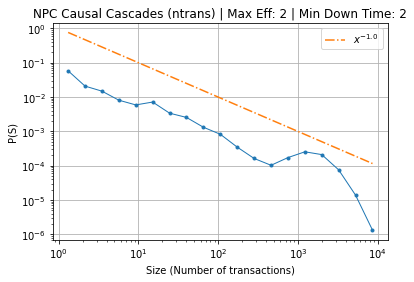

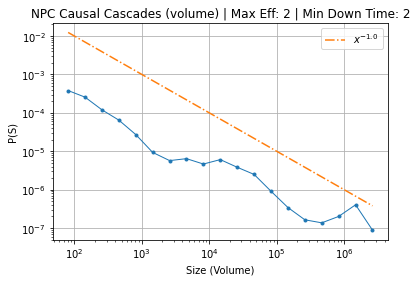

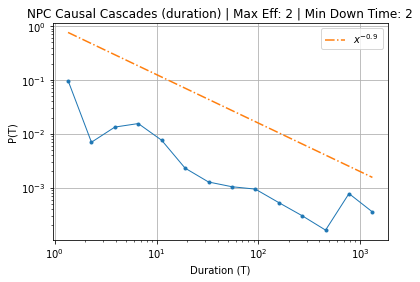

In [9]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*1, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9), '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

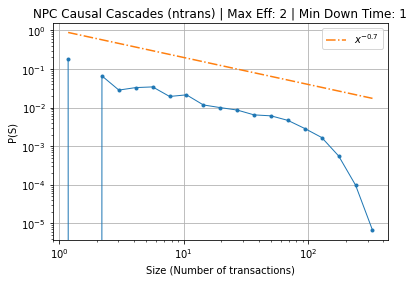

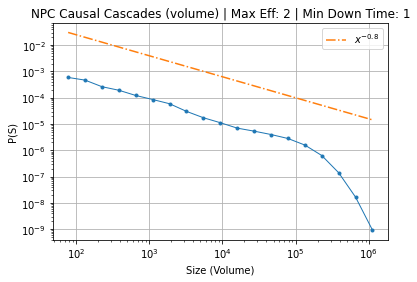

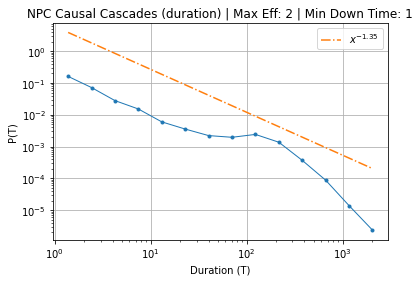

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

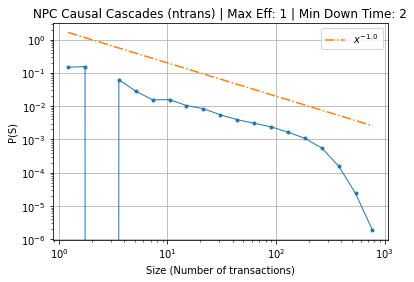

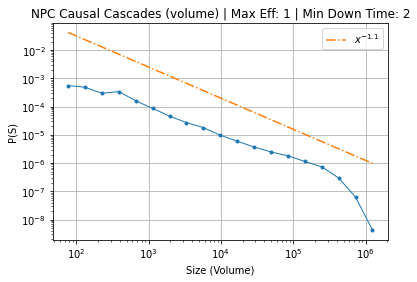

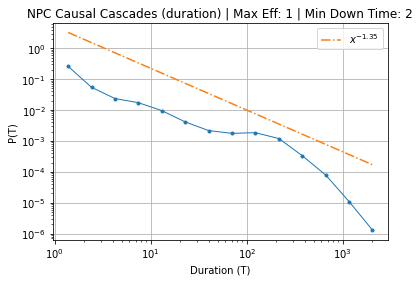

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

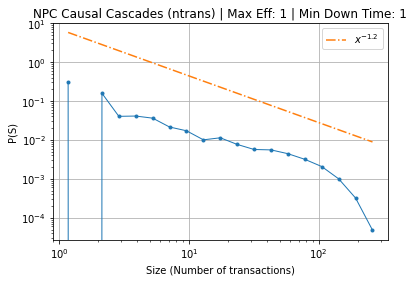

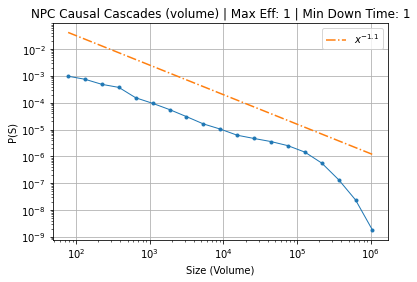

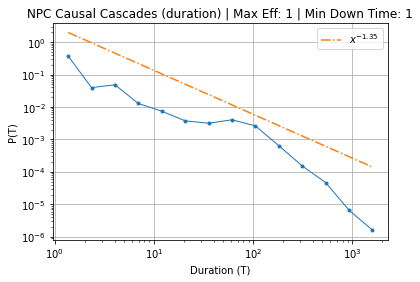

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/2-4/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
